#Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Functions

In [ ]:
def adjust_quantity(row):
    if row['Mouvement Type'] == 'Sold from':
        return -1**row['Quantity Done']
    else:
        return row['Quantity Done']

In [ ]:
def process_fridge_category(data_function):
  grouped_data = data_function.groupby(['Day of the week', 'Weeknumber', 'Mouvement Type','Forecast Category','Stock/Non-Stock'])['Quantity Done'].sum().reset_index()
  grouped_data = grouped_data.sort_values(by=['Weeknumber', 'Day of the week', 'Mouvement Type','Forecast Category','Stock/Non-Stock'])
  grouped_data_final= grouped_data[grouped_data['Stock/Non-Stock']=='Non-stock']
  #print(grouped_data_final)



  day_1_data = grouped_data_final[grouped_data_final['Day of the week'] == 1]
  # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
  day_1_grouped = day_1_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
  # Calculate net stock movement by week for Day 1
  day_1_net_movement = day_1_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
  # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
  pivot_day_1 = day_1_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

  # -----------------------------------------------

  has_transfer = any(day_1_grouped['Mouvement Type'] == 'Transfer')
  has_sold = any(day_1_grouped['Mouvement Type'] == 'Sold from')
  has_deliver = any(day_1_grouped['Mouvement Type'] == 'Delivered to')

  val_transfer = 0
  val_sold = 0
  val_deliver = 0

  if has_transfer:

    val_transfer = pivot_day_1['Transfer']

  if has_sold:

    val_sold = pivot_day_1['Sold from']

  if has_deliver:

    val_deliver = pivot_day_1['Delivered to']


  pivot_day_1['Net Movement'] = val_deliver + val_sold + val_transfer

  # -----------------------------------------------


  # Calculate the net stock movement for Day 1 of each week


  #print(pivot_day_1)
  day_1_net_movement = day_1_net_movement.rename(columns={'Quantity Done': 'Quantity Done1'})

  day_1_net_movement['Quantity Done1'] = day_1_net_movement['Quantity Done1'].fillna(0)
  all_weeks = range(day_1_net_movement['Weeknumber'].min(), day_1_net_movement['Weeknumber'].max() + 1)
  day_1_net_movement.set_index('Weeknumber', inplace=True)
  day_1_net_movement = day_1_net_movement.reindex(all_weeks).fillna(0).reset_index()
  # print(day_1_net_movement)




  day_2_data = grouped_data_final[grouped_data_final['Day of the week'] == 2]
  # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
  day_2_grouped = day_2_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
  # Calculate net stock movement by week for Day 2
  day_2_net_movement = day_2_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
  # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
  pivot_day_2 = day_2_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

  # Calculate the net stock movement for Day 2 of each week
  # -----------------------------------------------

  has_transfer = any(day_2_grouped['Mouvement Type'] == 'Transfer')
  has_sold = any(day_2_grouped['Mouvement Type'] == 'Sold from')
  has_deliver = any(day_2_grouped['Mouvement Type'] == 'Delivered to')

  val_transfer = 0
  val_sold = 0
  val_deliver = 0

  if has_transfer:

    val_transfer = pivot_day_2['Transfer']

  if has_sold:

    val_sold = pivot_day_2['Sold from']

  if has_deliver:

    val_deliver = pivot_day_2['Delivered to']


  pivot_day_2['Net Movement'] = val_deliver + val_sold + val_transfer

  # -----------------------------------------------

  #print(pivot_day_2)
  day_2_net_movement = day_2_net_movement.rename(columns={'Quantity Done': 'Quantity Done2'})

  day_2_net_movement['Quantity Done2'] = day_2_net_movement['Quantity Done2'].fillna(0)
  all_weeks = range(day_2_net_movement['Weeknumber'].min(), day_2_net_movement['Weeknumber'].max() + 1)
  day_2_net_movement.set_index('Weeknumber', inplace=True)
  day_2_net_movement = day_2_net_movement.reindex(all_weeks).fillna(0).reset_index()
  # print(day_2_net_movement)


  day_3_data = grouped_data_final[grouped_data_final['Day of the week'] == 3]
  # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
  day_3_grouped = day_3_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
  # Calculate net stock movement by week for Day 3
  day_3_net_movement = day_3_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
  # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
  pivot_day_3 = day_3_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

  # -----------------------------------------------

  has_transfer = any(day_3_grouped['Mouvement Type'] == 'Transfer')
  has_sold = any(day_3_grouped['Mouvement Type'] == 'Sold from')
  has_deliver = any(day_3_grouped['Mouvement Type'] == 'Delivered to')

  val_transfer = 0
  val_sold = 0
  val_deliver = 0

  if has_transfer:

    val_transfer = pivot_day_3['Transfer']

  if has_sold:

    val_sold = pivot_day_3['Sold from']

  if has_deliver:

    val_deliver = pivot_day_3['Delivered to']


  pivot_day_3['Net Movement'] = val_deliver + val_sold + val_transfer

  # -----------------------------------------------


  #print(pivot_day_3)
  day_3_net_movement = day_3_net_movement.rename(columns={'Quantity Done': 'Quantity Done3'})

  day_3_net_movement['Quantity Done3'] = day_3_net_movement['Quantity Done3'].fillna(0)
  all_weeks = range(day_3_net_movement['Weeknumber'].min(), day_3_net_movement['Weeknumber'].max() + 1)
  day_3_net_movement.set_index('Weeknumber', inplace=True)
  day_3_net_movement = day_3_net_movement.reindex(all_weeks).fillna(0).reset_index()
  # print(day_3_net_movement)



  day_4_data = grouped_data_final[grouped_data_final['Day of the week'] == 4]
  # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
  day_4_grouped = day_4_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
  # Calculate net stock movement by week for Day 4
  day_4_net_movement = day_4_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
  # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
  pivot_day_4 = day_4_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

  # -----------------------------------------------

  has_transfer = any(day_4_grouped['Mouvement Type'] == 'Transfer')
  has_sold = any(day_4_grouped['Mouvement Type'] == 'Sold from')
  has_deliver = any(day_4_grouped['Mouvement Type'] == 'Delivered to')

  val_transfer = 0
  val_sold = 0
  val_deliver = 0

  if has_transfer:

    val_transfer = pivot_day_4['Transfer']

  if has_sold:

    val_sold = pivot_day_4['Sold from']

  if has_deliver:

    val_deliver = pivot_day_4['Delivered to']


  pivot_day_4['Net Movement'] = val_deliver + val_sold + val_transfer

  # -----------------------------------------------

  #print(pivot_day_4)
  day_4_net_movement = day_4_net_movement.rename(columns={'Quantity Done': 'Quantity Done4'})

  day_4_net_movement['Quantity Done4'] = day_4_net_movement['Quantity Done4'].fillna(0)
  all_weeks = range(day_4_net_movement['Weeknumber'].min(), day_4_net_movement['Weeknumber'].max() + 1)
  day_4_net_movement.set_index('Weeknumber', inplace=True)
  day_4_net_movement = day_4_net_movement.reindex(all_weeks).fillna(0).reset_index()
  # print(day_4_net_movement)




  day_5_data = grouped_data_final[grouped_data_final['Day of the week'] == 5]
  # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
  day_5_grouped = day_5_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
  # Calculate net stock movement by week for Day 5
  day_5_net_movement = day_5_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
  # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
  pivot_day_5 = day_5_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

  # -----------------------------------------------

  has_transfer = any(day_5_grouped['Mouvement Type'] == 'Transfer')
  has_sold = any(day_5_grouped['Mouvement Type'] == 'Sold from')
  has_deliver = any(day_5_grouped['Mouvement Type'] == 'Delivered to')

  val_transfer = 0
  val_sold = 0
  val_deliver = 0

  if has_transfer:

    val_transfer = pivot_day_5['Transfer']

  if has_sold:

    val_sold = pivot_day_5['Sold from']

  if has_deliver:

    val_deliver = pivot_day_5['Delivered to']


  pivot_day_5['Net Movement'] = val_deliver + val_sold + val_transfer

  # -----------------------------------------------

  #print(pivot_day_5)
  day_5_net_movement = day_5_net_movement.rename(columns={'Quantity Done': 'Quantity Done5'})

  day_5_net_movement['Quantity Done5'] = day_5_net_movement['Quantity Done5'].fillna(0)
  all_weeks = range(day_5_net_movement['Weeknumber'].min(), day_5_net_movement['Weeknumber'].max() + 1)
  day_5_net_movement.set_index('Weeknumber', inplace=True)
  day_5_net_movement = day_5_net_movement.reindex(all_weeks).fillna(0).reset_index()
  # print(day_5_net_movement)



  con1 = pd.merge(day_1_net_movement, day_2_net_movement, on='Weeknumber', how='right')
  con2 = pd.merge(con1, day_3_net_movement, on='Weeknumber', how='left')
  con3 = pd.merge(con2, day_4_net_movement, on='Weeknumber', how='left')
  con4 = pd.merge(con3, day_5_net_movement, on='Weeknumber', how='left')
  confinal = con4.fillna(0)
  # print(confinal)



  inout_mat_ind = confinal.iloc[:,1:6].to_numpy()
  mat_ind = inout_mat_ind.cumsum(axis=1)

  inoutvec = confinal.iloc[:,1:6].to_numpy().flatten()


  csum_inout = inoutvec.cumsum()
  mat_chain = csum_inout.reshape((-1, 5))


  return mat_ind, mat_chain


# Main Code

In [ ]:
#data_test=pd.read_excel('/content/Test.xlsx')

In [ ]:
# data_test['Quantity Done'] = data_test.apply(adjust_quantity, axis=1)

In [ ]:
# mind,mchain = process_fridge_category(data_test)

In [ ]:
data_main=pd.read_excel('/content/MSC week20.xlsm')

In [ ]:
data_main['Quantity Done'] = data_main.apply(adjust_quantity, axis=1)

In [ ]:
data_clean = data_main[['Quantity Done', 'Day of the week', 'Weeknumber', 'Mouvement Type', "POS", "Forecast Category",'Stock/Non-Stock']]


In [ ]:
fridge_list  = ['MSC Belgium', 'MSC Shared Service']
product_list = ['Hot meals', 'Meal salads', 'Tartines, sandwiches & buns', 'Wraps']

dict_ind   = dict()
dict_chain = dict()
dict_check = dict()


for f in fridge_list:

  for p in product_list:

    print(f)
    print(p)

    data_prod = data_clean[(data_clean['POS'] == f) & (data_clean['Forecast Category'] == p)]
    data_function = data_prod[['Quantity Done','Day of the week', 'Weeknumber', 'Mouvement Type','Forecast Category','Stock/Non-Stock']]
    dict_check[(f,p)] = data_function

    mat_ind_prod, mat_chain_prod = process_fridge_category(data_function)

    dict_ind[(f,p)] = mat_ind_prod
    dict_chain[(f,p)] = mat_chain_prod


MSC Belgium
Hot meals
MSC Belgium
Meal salads
MSC Belgium
Tartines, sandwiches & buns
MSC Belgium
Wraps
MSC Shared Service
Hot meals
MSC Shared Service
Meal salads
MSC Shared Service
Tartines, sandwiches & buns
MSC Shared Service
Wraps


#Results

##Remaining products at MSC Belgium fridge

In [ ]:
dict_ind[('MSC Belgium','Hot meals')]

array([[-2., -3., -1., -1., -2.],
       [ 2.,  1.,  2.,  2.,  1.],
       [ 3.,  3.,  5.,  5.,  4.],
       [ 3.,  2.,  3.,  3.,  0.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  2.,  3.,  2.,  4.],
       [ 2.,  1.,  1.,  1.,  0.],
       [ 4.,  4.,  3.,  2.,  6.],
       [-1., -1., -1., -1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 4.,  2.,  2.,  2.,  5.],
       [ 0., -1., -4., -4., -5.],
       [ 0.,  0.,  4.,  4.,  3.],
       [ 0.,  0.,  3.,  3.,  2.],
       [ 0.,  0.,  2.,  2.,  1.],
       [ 0.,  0.,  0.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 3.,  2.,  2.,  2.,  2.]])

In [ ]:
dict_ind[('MSC Belgium','Tartines, sandwiches & buns')]

array([[ 6.,  3., 16., 10.,  3.],
       [ 4.,  0., 11.,  9.,  2.],
       [ 4.,  2., 12.,  8.,  4.],
       [ 6.,  3.,  8.,  8.,  4.],
       [ 5.,  2.,  8.,  7.,  3.],
       [ 7.,  5.,  9.,  5.,  3.],
       [ 3.,  1.,  4.,  3.,  3.],
       [ 4.,  2.,  8.,  4.,  2.],
       [ 5.,  3.,  7.,  2.,  2.],
       [ 7.,  3.,  7.,  5.,  3.],
       [ 8.,  5., 12.,  6.,  4.],
       [ 4.,  1., 12., 11.,  8.],
       [ 0.,  8.,  5.,  1., -1.],
       [ 5.,  4.,  8.,  7.,  3.],
       [ 4.,  1.,  6.,  3.,  2.],
       [ 3.,  0.,  3.,  1.,  1.],
       [ 5.,  1.,  1.,  4.,  2.],
       [ 4.,  2.,  1.,  1.,  1.],
       [ 5.,  2.,  5.,  0., -1.]])

In [ ]:
dict_ind[('MSC Belgium','Meal salads')]

array([[ 7.,  4., 12.,  9.,  8.],
       [ 3.,  2.,  8.,  6.,  1.],
       [ 2.,  1.,  4.,  2.,  2.],
       [ 3.,  1.,  9.,  9.,  7.],
       [ 6.,  3.,  7.,  6.,  3.],
       [ 7.,  4.,  5.,  4.,  4.],
       [ 5.,  4.,  7.,  4.,  3.],
       [ 3.,  2.,  7.,  4.,  3.],
       [ 1.,  0.,  4., -1., -1.],
       [ 6.,  1.,  4.,  4.,  1.],
       [ 1.,  0.,  4.,  2.,  1.],
       [ 3.,  2.,  7.,  4.,  0.],
       [ 0.,  6.,  3.,  2.,  0.],
       [ 6.,  4.,  7.,  3.,  2.],
       [ 4.,  3.,  5.,  4.,  3.],
       [ 3.,  2.,  5.,  3.,  3.],
       [ 4.,  0.,  0.,  3.,  2.],
       [ 7.,  6.,  6.,  6.,  6.],
       [ 3.,  2.,  7.,  6.,  4.]])

In [ ]:
dict_ind[('MSC Belgium','Wraps')]

array([[ 4.,  3.,  7.,  4.,  4.],
       [ 1.,  0.,  7.,  4.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 4.,  1.,  4.,  2.,  2.],
       [ 2.,  0.,  3.,  0.,  0.],
       [ 0., -1.,  0., -2., -2.],
       [ 2.,  1.,  2.,  2.,  2.],
       [ 3.,  2.,  4.,  4.,  4.],
       [ 0., -2.,  1.,  0.,  0.],
       [ 2.,  1.,  2.,  2.,  2.],
       [ 3.,  3.,  2.,  2.,  2.],
       [ 5.,  1.,  9.,  1., -1.],
       [ 0.,  3.,  0., -1., -1.],
       [ 5.,  4.,  7.,  4.,  3.],
       [ 6.,  5., 11.,  9.,  4.],
       [ 5.,  2.,  7.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [12.,  5.,  2.,  2.,  0.],
       [ 2., -1.,  9.,  1., -2.]])

##Remaining products at MSC Shared Service fridge

In [ ]:
dict_ind[('MSC Shared Service','Hot meals')]

array([[ 0., -2., -1., -1., -1.],
       [ 2.,  0.,  2.,  0.,  0.],
       [ 3.,  1.,  1.,  1.,  0.],
       [ 3.,  2.,  3.,  2.,  2.],
       [ 4.,  3.,  3.,  1.,  0.],
       [ 3.,  1.,  2.,  2.,  6.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 4.,  3.,  2.,  1.,  5.],
       [-2., -4., -5., -5., -1.],
       [ 0., -1., -2., -3., -3.],
       [ 4.,  3.,  2.,  2.,  7.],
       [ 0.,  0., -1., -4., -4.],
       [ 0., -1.,  2.,  1.,  0.],
       [ 0., -1.,  3.,  0., -2.],
       [-1., -1.,  7.,  4.,  2.],
       [ 0., -3., -3.,  2., -1.],
       [ 0., -2., -2., -2., -2.],
       [ 5.,  3.,  2.,  2.,  2.]])

In [ ]:
dict_ind[('MSC Shared Service','Tartines, sandwiches & buns')]

array([[ 2.,  0., 12., 10., 10.],
       [ 2.,  2.,  9.,  5.,  2.],
       [ 3.,  1.,  3.,  3.,  1.],
       [ 0.,  0.,  3.,  3.,  3.],
       [ 2.,  2.,  6.,  3.,  3.],
       [ 0.,  0.,  2.,  0.,  0.],
       [ 1.,  0.,  3.,  2.,  0.],
       [ 4.,  2.,  8.,  3.,  2.],
       [ 3.,  2.,  7.,  4.,  1.],
       [ 1.,  0.,  5.,  1.,  1.],
       [ 3.,  1.,  5.,  4.,  0.],
       [ 0.,  4.,  3.,  0.,  0.],
       [ 4.,  3.,  7.,  5.,  4.],
       [ 3.,  1.,  8.,  2.,  1.],
       [ 8.,  6.,  8.,  7.,  4.],
       [ 3.,  1.,  1.,  4.,  2.],
       [ 5.,  5.,  0.,  0., -1.],
       [ 2.,  1.,  5.,  0.,  0.]])

In [ ]:
dict_ind[('MSC Shared Service','Meal salads')]

array([[ 1.,  0.,  3.,  2.,  1.],
       [ 4.,  4.,  6.,  5.,  5.],
       [ 3.,  1.,  3.,  1.,  1.],
       [ 2.,  1.,  2.,  1.,  1.],
       [ 3.,  1.,  3.,  3.,  3.],
       [ 1.,  1.,  3.,  3.,  3.],
       [ 2.,  1.,  4.,  3.,  2.],
       [ 3.,  2.,  3.,  1.,  0.],
       [ 5.,  3.,  7.,  5.,  4.],
       [ 3.,  3.,  7.,  7.,  5.],
       [ 4.,  2.,  7.,  6.,  5.],
       [ 3.,  2.,  6.,  6.,  5.],
       [ 0.,  4.,  4.,  3.,  2.],
       [ 3.,  1.,  3.,  3.,  3.],
       [ 0.,  0.,  4.,  1., -1.],
       [ 5.,  3.,  8.,  5.,  5.],
       [ 2.,  0.,  0.,  2.,  1.],
       [ 5.,  3.,  1.,  1.,  1.],
       [ 4.,  0.,  3.,  1.,  1.]])

In [ ]:
dict_ind[('MSC Shared Service','Wraps')]

array([[ 2.,  1.,  5.,  3.,  2.],
       [ 1.,  0.,  3.,  1.,  1.],
       [ 2.,  2.,  4.,  3.,  2.],
       [ 3.,  0.,  5.,  5.,  4.],
       [ 1.,  1.,  2.,  2.,  2.],
       [ 2.,  0.,  1.,  1.,  1.],
       [ 2.,  1.,  4.,  3.,  3.],
       [ 2.,  1.,  3.,  1.,  1.],
       [ 1.,  0.,  5., -1., -1.],
       [ 1.,  0.,  2.,  0.,  0.],
       [ 0., -2.,  2.,  0., -2.],
       [ 7.,  6.,  5.,  3.,  3.],
       [ 0.,  7.,  4.,  3.,  2.],
       [ 4.,  1., 10.,  7.,  4.],
       [ 2.,  0., 10.,  4.,  1.],
       [ 5.,  2., 12.,  9.,  4.],
       [ 2.,  0.,  0.,  1.,  1.],
       [ 3.,  3.,  0.,  0.,  0.],
       [ 3.,  1.,  2.,  1.,  1.]])

#Weekly report

##MSC Belgium fridge

In [ ]:
# Hot_meal_msc=np.array([[ 0.,  3.,  1.,  1.,  3.],
#        [-1., -1.,  2.,  1.,  4.],
#        [-2., -3., -1., -1., -2.],
#        [ 2.,  1.,  2.,  2.,  1.],
#        [ 3.,  3.,  5.,  5.,  4.],
#        [ 3.,  2.,  3.,  3.,  0.],
#        [ 2.,  2.,  2.,  2.,  2.],
#        [ 3.,  2.,  3.,  2.,  4.],
#        [ 2.,  1.,  1.,  1.,  0.],
#        [ 4.,  4.,  3.,  2.,  6.],
#        [-1., -1., -1., -1.,  1.],
#        [ 0.,  0.,  0.,  0.,  0.],
#        [ 4.,  2.,  2.,  2.,  5.],
#        [ 0., -1., -4., -4., -4.],
#        [0.,0.,0.,0.,0.] ])
# Hot_meal_vec=Hot_meal_msc.flatten()

# Hot_meal_msc[Hot_meal_msc == 0] = np.nan

# result_matrix_hot_meal = np.copy(Hot_meal_msc)

# with np.errstate(divide='ignore', invalid='ignore'):
#     result_matrix_hot_meal[:, 1] = (result_matrix_hot_meal[:, 1] / result_matrix_hot_meal[:, 0])*100  # Column 2 / Column 1
#     result_matrix_hot_meal[:, 3] = (result_matrix_hot_meal[:, 3] / result_matrix_hot_meal[:, 2])*100  # Column 4 / Column 3
#     result_matrix_hot_meal[:, 4] = (result_matrix_hot_meal[:, 4] / result_matrix_hot_meal[:, 2])*100  # Column 5 / Column 3

# # Replace NaNs with zero after calculations
# result_matrix_hot_meal = np.nan_to_num(result_matrix_hot_meal, nan=0)
# result_matrix_hot_meal[:, 0] = 100
# result_matrix_hot_meal[:, 2] = 100
# # print("Hot Meal matrix:")
# #print(result_matrix_hot_meal)

# difference_Hot_meal_msc=np.copy(result_matrix_hot_meal)
# difference_Hot_meal_msc[:,1]=result_matrix_hot_meal[:, 1]-result_matrix_hot_meal[:, 0]
# difference_Hot_meal_msc[:,3]=result_matrix_hot_meal[:, 3]-result_matrix_hot_meal[:, 2]
# difference_Hot_meal_msc[:,4]=result_matrix_hot_meal[:, 4]-result_matrix_hot_meal[:, 2]
# print(difference_Hot_meal_msc)

In [ ]:

Tartines_msc=np.array([[ 6.,  3., 16., 10.,  3.],
       [ 4.,  0., 11.,  9.,  2.],
       [ 4.,  2., 12.,  8.,  4.],
       [ 6.,  3.,  8.,  8.,  4.],
       [ 5.,  2.,  8.,  7.,  3.],
       [ 7.,  5.,  9.,  5.,  3.],
       [ 3.,  1.,  4.,  3.,  3.],
       [ 4.,  2.,  8.,  4.,  2.],
       [ 5.,  3.,  7.,  2.,  2.],
       [ 7.,  3.,  7.,  5.,  3.],
       [ 8.,  5., 12.,  6.,  4.],
       [ 4.,  1., 12., 11.,  8.],
       [ 0.,  8.,  5.,  1., -1.],
       [ 5.,  4.,  8.,  7.,  3.],
       [ 4.,  1.,  6.,  3.,  2.],
       [ 3.,  0.,  3.,  1.,  1.],
       [ 5.,  1.,  1.,  4.,  2.],
       [ 4.,  2.,  1.,  1.,  1.],
       [ 5.,  2.,  5.,  0., -1.]])

tartines_vec=Tartines_msc.flatten()

Tartines_msc[Tartines_msc == 0] = np.nan
result_matrix_tartines = np.copy(Tartines_msc)

with np.errstate(divide='ignore', invalid='ignore'):
    result_matrix_tartines[:, 1] = (result_matrix_tartines[:, 1] / result_matrix_tartines[:, 0])*100  # Column 2 / Column 1
    result_matrix_tartines[:, 3] = (result_matrix_tartines[:, 3] / result_matrix_tartines[:, 2])*100  # Column 4 / Column 3
    result_matrix_tartines[:, 4] = (result_matrix_tartines[:, 4] / result_matrix_tartines[:, 2])*100  # Column 5 / Column 3

# Replace NaNs with zero after calculations
result_matrix_tartines = np.nan_to_num(result_matrix_tartines, nan=0)
result_matrix_tartines[:, 0] = 100
result_matrix_tartines[:, 2] = 100
# print("Tartines matrix:")
print(result_matrix_tartines)

[[100.          50.         100.          62.5         18.75      ]
 [100.           0.         100.          81.81818182  18.18181818]
 [100.          50.         100.          66.66666667  33.33333333]
 [100.          50.         100.         100.          50.        ]
 [100.          40.         100.          87.5         37.5       ]
 [100.          71.42857143 100.          55.55555556  33.33333333]
 [100.          33.33333333 100.          75.          75.        ]
 [100.          50.         100.          50.          25.        ]
 [100.          60.         100.          28.57142857  28.57142857]
 [100.          42.85714286 100.          71.42857143  42.85714286]
 [100.          62.5        100.          50.          33.33333333]
 [100.          25.         100.          91.66666667  66.66666667]
 [100.           0.         100.          20.         -20.        ]
 [100.          80.         100.          87.5         37.5       ]
 [100.          25.         100.          50.   

In [ ]:
# meal_salads_msc=np.array([[ 0.,  5.,  3.,  1.,  1.],
#        [ 7.,  4., 12.,  9.,  8.],
#        [ 3.,  2.,  8.,  6.,  2.],
#        [ 2.,  1.,  4.,  2.,  2.],
#        [ 3.,  1.,  9.,  9.,  7.],
#        [ 6.,  3.,  7.,  6.,  3.],
#        [ 7.,  4.,  5.,  4.,  4.],
#        [ 5.,  4.,  7.,  4.,  3.],
#        [ 3.,  2.,  7.,  4.,  3.],
#        [ 1.,  0.,  4., -1., -1.],
#        [ 6.,  1.,  4.,  4.,  1.],
#        [ 1.,  0.,  4.,  2.,  1.],
#        [ 3.,  2.,  7.,  4.,  0.],
#        [ 0.,  6.,  3.,  2.,  0.],
#        [7., 0., 0., 0., 0.]])

meal_salads_msc=np.array([[ 7.,  4., 12.,  9.,  8.],
       [ 3.,  2.,  8.,  6.,  1.],
       [ 2.,  1.,  4.,  2.,  2.],
       [ 3.,  1.,  9.,  9.,  7.],
       [ 6.,  3.,  7.,  6.,  3.],
       [ 7.,  4.,  5.,  4.,  4.],
       [ 5.,  4.,  7.,  4.,  3.],
       [ 3.,  2.,  7.,  4.,  3.],
       [ 1.,  0.,  4., -1., -1.],
       [ 6.,  1.,  4.,  4.,  1.],
       [ 1.,  0.,  4.,  2.,  1.],
       [ 3.,  2.,  7.,  4.,  0.],
       [ 0.,  6.,  3.,  2.,  0.],
       [ 6.,  4.,  7.,  3.,  2.],
       [ 4.,  3.,  5.,  4.,  3.],
       [ 3.,  2.,  5.,  3.,  3.],
       [ 4.,  0.,  0.,  3.,  2.],
       [ 7.,  6.,  6.,  6.,  6.],
       [ 3.,  2.,  7.,  6.,  4.]])

meal_salads_vec=meal_salads_msc.flatten()

meal_salads_msc[meal_salads_msc == 0] = np.nan
result_matrix_meal_salads = np.copy(meal_salads_msc)

with np.errstate(divide='ignore', invalid='ignore'):
    result_matrix_meal_salads[:, 1] = (result_matrix_meal_salads[:, 1] / result_matrix_meal_salads[:, 0])*100  # Column 2 / Column 1
    result_matrix_meal_salads[:, 3] = (result_matrix_meal_salads[:, 3] / result_matrix_meal_salads[:, 2])*100  # Column 4 / Column 3
    result_matrix_meal_salads[:, 4] = (result_matrix_meal_salads[:, 4] / result_matrix_meal_salads[:, 2])*100  # Column 5 / Column 3

# Replace NaNs with zero after calculations
result_matrix_meal_salads = np.nan_to_num(result_matrix_meal_salads, nan=0)
result_matrix_meal_salads[:, 0] = 100
result_matrix_meal_salads[:, 2] = 100
# print("meal_salads matrix:")
print(result_matrix_meal_salads)

[[100.          57.14285714 100.          75.          66.66666667]
 [100.          66.66666667 100.          75.          12.5       ]
 [100.          50.         100.          50.          50.        ]
 [100.          33.33333333 100.         100.          77.77777778]
 [100.          50.         100.          85.71428571  42.85714286]
 [100.          57.14285714 100.          80.          80.        ]
 [100.          80.         100.          57.14285714  42.85714286]
 [100.          66.66666667 100.          57.14285714  42.85714286]
 [100.           0.         100.         -25.         -25.        ]
 [100.          16.66666667 100.         100.          25.        ]
 [100.           0.         100.          50.          25.        ]
 [100.          66.66666667 100.          57.14285714   0.        ]
 [100.           0.         100.          66.66666667   0.        ]
 [100.          66.66666667 100.          42.85714286  28.57142857]
 [100.          75.         100.          80.   

In [ ]:
# wraps_msc=np.array([[0.,0.,0.,0.,0.],
#        [ 4.,  3.,  7.,  4.,  4.],
#        [ 1.,  0.,  7.,  4.,  1.],
#        [ 1.,  1.,  1.,  1.,  1.],
#        [ 4.,  1.,  4.,  2.,  2.],
#        [ 2.,  0.,  3.,  0.,  0.],
#        [ 0., -1.,  0., -2., -2.],
#        [ 2.,  1.,  2.,  2.,  2.],
#        [ 3.,  2.,  4.,  4.,  4.],
#        [ 0., -2.,  1.,  0.,  0.],
#        [ 2.,  1.,  2.,  2.,  2.],
#        [ 3.,  3.,  2.,  2.,  2.],
#        [ 5.,  1.,  9.,  1., -1.],
#        [ 0.,  3.,  0., -1., -1.],
#        [6., 1., 1., 1., 1.]])

wraps_msc=np.array([[ 4.,  3.,  7.,  4.,  4.],
       [ 1.,  0.,  7.,  4.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 4.,  1.,  4.,  2.,  2.],
       [ 2.,  0.,  3.,  0.,  0.],
       [ 0., -1.,  0., -2., -2.],
       [ 2.,  1.,  2.,  2.,  2.],
       [ 3.,  2.,  4.,  4.,  4.],
       [ 0., -2.,  1.,  0.,  0.],
       [ 2.,  1.,  2.,  2.,  2.],
       [ 3.,  3.,  2.,  2.,  2.],
       [ 5.,  1.,  9.,  1., -1.],
       [ 0.,  3.,  0., -1., -1.],
       [ 5.,  4.,  7.,  4.,  3.],
       [ 6.,  5., 11.,  9.,  4.],
       [ 5.,  2.,  7.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [12.,  5.,  2.,  2.,  0.],
       [ 2., -1.,  9.,  1., -2.]])


wraps_vec=wraps_msc.flatten()

wraps_msc[wraps_msc == 0] = np.nan
result_matrix_wraps = np.copy(wraps_msc)

with np.errstate(divide='ignore', invalid='ignore'):
    result_matrix_wraps[:, 1] = (result_matrix_wraps[:, 1] / result_matrix_wraps[:, 0])*100  # Column 2 / Column 1
    result_matrix_wraps[:, 3] = (result_matrix_wraps[:, 3] / result_matrix_wraps[:, 2])*100  # Column 4 / Column 3
    result_matrix_wraps[:, 4] = (result_matrix_wraps[:, 4] / result_matrix_wraps[:, 2])*100  # Column 5 / Column 3

# Replace NaNs with zero after calculations
result_matrix_wraps = np.nan_to_num(result_matrix_wraps, nan=0)
result_matrix_wraps[:, 0] = 100
result_matrix_wraps[:, 2] = 100
# print("wraps matrix:")
print(result_matrix_wraps)


[[100.          75.         100.          57.14285714  57.14285714]
 [100.           0.         100.          57.14285714  14.28571429]
 [100.         100.         100.         100.         100.        ]
 [100.          25.         100.          50.          50.        ]
 [100.           0.         100.           0.           0.        ]
 [100.           0.         100.           0.           0.        ]
 [100.          50.         100.         100.         100.        ]
 [100.          66.66666667 100.         100.         100.        ]
 [100.           0.         100.           0.           0.        ]
 [100.          50.         100.         100.         100.        ]
 [100.         100.         100.         100.         100.        ]
 [100.          20.         100.          11.11111111 -11.11111111]
 [100.           0.         100.           0.           0.        ]
 [100.          80.         100.          57.14285714  42.85714286]
 [100.          83.33333333 100.          81.818

##MSC Shared Service fridge

In [ ]:
Tartines_shared=np.array([[ 2.,  0., 12., 10., 10.],
       [ 2.,  2.,  9.,  5.,  2.],
       [ 3.,  1.,  3.,  3.,  1.],
       [ 0.,  0.,  3.,  3.,  3.],
       [ 2.,  2.,  6.,  3.,  3.],
       [ 0.,  0.,  2.,  0.,  0.],
       [ 1.,  0.,  3.,  2.,  0.],
       [ 4.,  2.,  8.,  3.,  2.],
       [ 3.,  2.,  7.,  4.,  1.],
       [ 1.,  0.,  5.,  1.,  1.],
       [ 3.,  1.,  5.,  4.,  0.],
       [ 0.,  4.,  3.,  0.,  0.],
       [ 4.,  3.,  7.,  5.,  4.],
       [ 3.,  1.,  8.,  2.,  1.],
       [ 8.,  6.,  8.,  7.,  4.],
       [ 3.,  1.,  1.,  4.,  2.],
       [ 5.,  5.,  0.,  0., -1.],
       [ 2.,  1.,  5.,  0.,  0.]])


tartines_vec=Tartines_shared.flatten()

Tartines_shared[Tartines_shared == 0] = np.nan
result_matrix_tartines = np.copy(Tartines_shared)

with np.errstate(divide='ignore', invalid='ignore'):
    result_matrix_tartines[:, 1] = (result_matrix_tartines[:, 1] / result_matrix_tartines[:, 0])*100  # Column 2 / Column 1
    result_matrix_tartines[:, 3] = (result_matrix_tartines[:, 3] / result_matrix_tartines[:, 2])*100  # Column 4 / Column 3
    result_matrix_tartines[:, 4] = (result_matrix_tartines[:, 4] / result_matrix_tartines[:, 2])*100  # Column 5 / Column 3

# Replace NaNs with zero after calculations
result_matrix_tartines = np.nan_to_num(result_matrix_tartines, nan=0)
result_matrix_tartines[:, 0] = 100
result_matrix_tartines[:, 2] = 100
# print("Tartines matrix:")
#print(result_matrix_tartines)

Tartines_shared=np.copy(result_matrix_tartines)
Tartines_shared[:,1]=result_matrix_tartines[:, 1]-result_matrix_tartines[:, 0]
Tartines_shared[:,3]=result_matrix_tartines[:, 3]-result_matrix_tartines[:, 2]
Tartines_shared[:,4]=result_matrix_tartines[:, 4]-result_matrix_tartines[:, 2]
print(Tartines_shared)

[[ 100.         -100.          100.          -16.66666667  -16.66666667]
 [ 100.            0.          100.          -44.44444444  -77.77777778]
 [ 100.          -66.66666667  100.            0.          -66.66666667]
 [ 100.         -100.          100.            0.            0.        ]
 [ 100.            0.          100.          -50.          -50.        ]
 [ 100.         -100.          100.         -100.         -100.        ]
 [ 100.         -100.          100.          -33.33333333 -100.        ]
 [ 100.          -50.          100.          -62.5         -75.        ]
 [ 100.          -33.33333333  100.          -42.85714286  -85.71428571]
 [ 100.         -100.          100.          -80.          -80.        ]
 [ 100.          -66.66666667  100.          -20.         -100.        ]
 [ 100.         -100.          100.         -100.         -100.        ]
 [ 100.          -25.          100.          -28.57142857  -42.85714286]
 [ 100.          -66.66666667  100.          -75.  

In [ ]:
meal_salads_shared=np.array([[ 1.,  0.,  3.,  2.,  1.],
       [ 4.,  4.,  6.,  5.,  5.],
       [ 3.,  1.,  3.,  1.,  1.],
       [ 2.,  1.,  2.,  1.,  1.],
       [ 3.,  1.,  3.,  3.,  3.],
       [ 1.,  1.,  3.,  3.,  3.],
       [ 2.,  1.,  4.,  3.,  2.],
       [ 3.,  2.,  3.,  1.,  0.],
       [ 5.,  3.,  7.,  5.,  4.],
       [ 3.,  3.,  7.,  7.,  5.],
       [ 4.,  2.,  7.,  6.,  5.],
       [ 3.,  2.,  6.,  6.,  5.],
       [ 0.,  4.,  4.,  3.,  2.],
       [ 3.,  1.,  3.,  3.,  3.],
       [ 0.,  0.,  4.,  1., -1.],
       [ 5.,  3.,  8.,  5.,  5.],
       [ 2.,  0.,  0.,  2.,  1.],
       [ 5.,  3.,  1.,  1.,  1.],
       [ 4.,  0.,  3.,  1.,  1.]])

meal_salads_vec=meal_salads_shared.flatten()

meal_salads_shared[meal_salads_shared == 0] = np.nan
result_matrix_meal_salads = np.copy(meal_salads_shared)

with np.errstate(divide='ignore', invalid='ignore'):
    result_matrix_meal_salads[:, 1] = (result_matrix_meal_salads[:, 1] / result_matrix_meal_salads[:, 0])*100  # Column 2 / Column 1
    result_matrix_meal_salads[:, 3] = (result_matrix_meal_salads[:, 3] / result_matrix_meal_salads[:, 2])*100  # Column 4 / Column 3
    result_matrix_meal_salads[:, 4] = (result_matrix_meal_salads[:, 4] / result_matrix_meal_salads[:, 2])*100  # Column 5 / Column 3

# Replace NaNs with zero after calculations
result_matrix_meal_salads = np.nan_to_num(result_matrix_meal_salads, nan=0)
result_matrix_meal_salads[:, 0] = 100
result_matrix_meal_salads[:, 2] = 100
# print("meal_salads matrix:")
#print(result_matrix_meal_salads)

difference_meal_salads_shared=np.copy(result_matrix_meal_salads)
difference_meal_salads_shared[:,1]=result_matrix_meal_salads[:, 1]-result_matrix_meal_salads[:, 0]
difference_meal_salads_shared[:,3]=result_matrix_meal_salads[:, 3]-result_matrix_meal_salads[:, 2]
difference_meal_salads_shared[:,4]=result_matrix_meal_salads[:, 4]-result_matrix_meal_salads[:, 2]
print(difference_meal_salads_shared)

[[ 100.         -100.          100.          -33.33333333  -66.66666667]
 [ 100.            0.          100.          -16.66666667  -16.66666667]
 [ 100.          -66.66666667  100.          -66.66666667  -66.66666667]
 [ 100.          -50.          100.          -50.          -50.        ]
 [ 100.          -66.66666667  100.            0.            0.        ]
 [ 100.            0.          100.            0.            0.        ]
 [ 100.          -50.          100.          -25.          -50.        ]
 [ 100.          -33.33333333  100.          -66.66666667 -100.        ]
 [ 100.          -40.          100.          -28.57142857  -42.85714286]
 [ 100.            0.          100.            0.          -28.57142857]
 [ 100.          -50.          100.          -14.28571429  -28.57142857]
 [ 100.          -33.33333333  100.            0.          -16.66666667]
 [ 100.         -100.          100.          -25.          -50.        ]
 [ 100.          -66.66666667  100.            0.  

In [ ]:
wraps_shared=np.array([[ 2.,  1.,  5.,  3.,  2.],
       [ 1.,  0.,  3.,  1.,  1.],
       [ 2.,  2.,  4.,  3.,  2.],
       [ 3.,  0.,  5.,  5.,  4.],
       [ 1.,  1.,  2.,  2.,  2.],
       [ 2.,  0.,  1.,  1.,  1.],
       [ 2.,  1.,  4.,  3.,  3.],
       [ 2.,  1.,  3.,  1.,  1.],
       [ 1.,  0.,  5., -1., -1.],
       [ 1.,  0.,  2.,  0.,  0.],
       [ 0., -2.,  2.,  0., -2.],
       [ 7.,  6.,  5.,  3.,  3.],
       [ 0.,  7.,  4.,  3.,  2.],
       [ 4.,  1., 10.,  7.,  4.],
       [ 2.,  0., 10.,  4.,  1.],
       [ 5.,  2., 12.,  9.,  4.],
       [ 2.,  0.,  0.,  1.,  1.],
       [ 3.,  3.,  0.,  0.,  0.],
       [ 3.,  1.,  2.,  1.,  1.]])

wraps_vec=wraps_shared.flatten()

wraps_shared[wraps_shared == 0] = np.nan
result_matrix_wraps = np.copy(wraps_shared)

with np.errstate(divide='ignore', invalid='ignore'):
    result_matrix_wraps[:, 1] = (result_matrix_wraps[:, 1] / result_matrix_wraps[:, 0])*100  # Column 2 / Column 1
    result_matrix_wraps[:, 3] = (result_matrix_wraps[:, 3] / result_matrix_wraps[:, 2])*100  # Column 4 / Column 3
    result_matrix_wraps[:, 4] = (result_matrix_wraps[:, 4] / result_matrix_wraps[:, 2])*100  # Column 5 / Column 3

# Replace NaNs with zero after calculations
result_matrix_wraps = np.nan_to_num(result_matrix_wraps, nan=0)
result_matrix_wraps[:, 0] = 100
result_matrix_wraps[:, 2] = 100
# print("wraps matrix:")
#print(result_matrix_wraps)

difference_wraps_shared=np.copy(result_matrix_wraps)
difference_wraps_shared[:,1]=result_matrix_wraps[:, 1]-result_matrix_wraps[:, 0]
difference_wraps_shared[:,3]=result_matrix_wraps[:, 3]-result_matrix_wraps[:, 2]
difference_wraps_shared[:,4]=result_matrix_wraps[:, 4]-result_matrix_wraps[:, 2]
print(difference_wraps_shared)

[[ 100.          -50.          100.          -40.          -60.        ]
 [ 100.         -100.          100.          -66.66666667  -66.66666667]
 [ 100.            0.          100.          -25.          -50.        ]
 [ 100.         -100.          100.            0.          -20.        ]
 [ 100.            0.          100.            0.            0.        ]
 [ 100.         -100.          100.            0.            0.        ]
 [ 100.          -50.          100.          -25.          -25.        ]
 [ 100.          -50.          100.          -66.66666667  -66.66666667]
 [ 100.         -100.          100.         -120.         -120.        ]
 [ 100.         -100.          100.         -100.         -100.        ]
 [ 100.         -100.          100.         -100.         -200.        ]
 [ 100.          -14.28571429  100.          -40.          -40.        ]
 [ 100.         -100.          100.          -25.          -50.        ]
 [ 100.          -75.          100.          -30.  

##Which product was sold faster in each week?

##MSC Belgium fridge

##Absolute

In [ ]:
import numpy as np

Tartines_msc = np.array([[ 6.,  3., 16., 10.,  3.],
       [ 4.,  0., 11.,  9.,  2.],
       [ 4.,  2., 12.,  8.,  4.],
       [ 6.,  3.,  8.,  8.,  4.],
       [ 5.,  2.,  8.,  7.,  3.],
       [ 7.,  5.,  9.,  5.,  3.],
       [ 3.,  1.,  4.,  3.,  3.],
       [ 4.,  2.,  8.,  4.,  2.],
       [ 5.,  3.,  7.,  2.,  2.],
       [ 7.,  3.,  7.,  5.,  3.],
       [ 8.,  5., 12.,  6.,  4.],
       [ 4.,  1., 12., 11.,  8.],
       [ 0.,  8.,  5.,  1., -1.],
       [ 5.,  4.,  8.,  7.,  3.],
       [ 4.,  1.,  6.,  3.,  2.],
       [ 3.,  0.,  3.,  1.,  1.],
       [ 5.,  1.,  1.,  4.,  2.],
       [ 4.,  2.,  1.,  1.,  1.],
       [ 5.,  2.,  5.,  0., -1.]])

tartines = np.array([
    [9,20],
    [7,13],
    [7,17],
    [10,11],
    [8,10],
    [8,12],
    [8,9],
    [8,9],
    [11,12],
    [9,13],
    [9,15],
    [10,21],
    [0,8],
    [7,19],
    [7,7],
    [5,5],
    [6,0],
    [8,0],
    [6,8]
])


column_to_insert_1 = tartines[:, 0]  # First column of tartines
column_to_insert_2 = tartines[:, 1]  # Second column of tartines

final_matrix_1 = np.insert(Tartines_msc, 0, column_to_insert_1, axis=1)
final_matrix_2 = np.insert(Tartines_msc, 2, column_to_insert_2, axis=1)
# print(final_matrix_2)

columns_from_final_matrix_1 = final_matrix_1[:, [0, 1,2]]  # Columns 1, 2,3 from final_matrix_1
columns_from_final_matrix_2 = final_matrix_2[:, [2,3, 4, 5]]  # Columns 3, 4, 5, 6 from final_matrix_2

final_combined_matrix_tartine = np.hstack((columns_from_final_matrix_1, columns_from_final_matrix_2))

print(final_combined_matrix_tartine)

#Percentage
matrix_tartines = np.copy(final_combined_matrix_tartine)
matrix_tartines[:, 1] = (matrix_tartines[:, 1] / matrix_tartines[:, 0])*100  # Column 2 / Column 1
matrix_tartines[:, 2] = (matrix_tartines[:, 2] / matrix_tartines[:, 0])*100  # Column 3 / Column 1
matrix_tartines[:, 4] = (matrix_tartines[:, 4] / matrix_tartines[:, 3])*100  # Column 5 / Column 4
matrix_tartines[:, 5] = (matrix_tartines[:, 5] / matrix_tartines[:, 3])*100  # Column 6 / Column 4
matrix_tartines[:, 6] = (matrix_tartines[:, 6] / matrix_tartines[:, 3])*100  # Column 7 / Column 4
matrix_tartines[:, 0] = (matrix_tartines[:, 1] / matrix_tartines[:, 1])*100  # Column 1
matrix_tartines[:, 3] = (matrix_tartines[:, 3] / matrix_tartines[:, 3])*100  # Column 3
print(matrix_tartines)

[[ 9.  6.  3. 20. 16. 10.  3.]
 [ 7.  4.  0. 13. 11.  9.  2.]
 [ 7.  4.  2. 17. 12.  8.  4.]
 [10.  6.  3. 11.  8.  8.  4.]
 [ 8.  5.  2. 10.  8.  7.  3.]
 [ 8.  7.  5. 12.  9.  5.  3.]
 [ 8.  3.  1.  9.  4.  3.  3.]
 [ 8.  4.  2.  9.  8.  4.  2.]
 [11.  5.  3. 12.  7.  2.  2.]
 [ 9.  7.  3. 13.  7.  5.  3.]
 [ 9.  8.  5. 15. 12.  6.  4.]
 [10.  4.  1. 21. 12. 11.  8.]
 [ 0.  0.  8.  8.  5.  1. -1.]
 [ 7.  5.  4. 19.  8.  7.  3.]
 [ 7.  4.  1.  7.  6.  3.  2.]
 [ 5.  3.  0.  5.  3.  1.  1.]
 [ 6.  5.  1.  0.  1.  4.  2.]
 [ 8.  4.  2.  0.  1.  1.  1.]
 [ 6.  5.  2.  8.  5.  0. -1.]]
[[100.          66.66666667  33.33333333 100.          80.
   50.          15.        ]
 [100.          57.14285714   0.         100.          84.61538462
   69.23076923  15.38461538]
 [100.          57.14285714  28.57142857 100.          70.58823529
   47.05882353  23.52941176]
 [100.          60.          30.         100.          72.72727273
   72.72727273  36.36363636]
 [100.          62.5         25.  

<ipython-input-22-651449188f96>:62: RuntimeWarning: invalid value encountered in divide
  matrix_tartines[:, 1] = (matrix_tartines[:, 1] / matrix_tartines[:, 0])*100  # Column 2 / Column 1
<ipython-input-22-651449188f96>:63: RuntimeWarning: divide by zero encountered in divide
  matrix_tartines[:, 2] = (matrix_tartines[:, 2] / matrix_tartines[:, 0])*100  # Column 3 / Column 1
<ipython-input-22-651449188f96>:64: RuntimeWarning: divide by zero encountered in divide
  matrix_tartines[:, 4] = (matrix_tartines[:, 4] / matrix_tartines[:, 3])*100  # Column 5 / Column 4
<ipython-input-22-651449188f96>:65: RuntimeWarning: divide by zero encountered in divide
  matrix_tartines[:, 5] = (matrix_tartines[:, 5] / matrix_tartines[:, 3])*100  # Column 6 / Column 4
<ipython-input-22-651449188f96>:66: RuntimeWarning: divide by zero encountered in divide
  matrix_tartines[:, 6] = (matrix_tartines[:, 6] / matrix_tartines[:, 3])*100  # Column 7 / Column 4
<ipython-input-22-651449188f96>:68: RuntimeWarning:

In [ ]:

wraps_msc=np.array([[ 4.,  3.,  7.,  4.,  4.],
       [ 1.,  0.,  7.,  4.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 4.,  1.,  4.,  2.,  2.],
       [ 2.,  0.,  3.,  0.,  0.],
       [ 0., -1.,  0., -2., -2.],
       [ 2.,  1.,  2.,  2.,  2.],
       [ 3.,  2.,  4.,  4.,  4.],
       [ 0., -2.,  1.,  0.,  0.],
       [ 2.,  1.,  2.,  2.,  2.],
       [ 3.,  3.,  2.,  2.,  2.],
       [ 5.,  1.,  9.,  1., -1.],
       [ 0.,  3.,  0., -1., -1.],
       [ 5.,  4.,  7.,  4.,  3.],
       [ 6.,  5., 11.,  9.,  4.],
       [ 5.,  2.,  7.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [12.,  5.,  2.,  2.,  0.],
       [ 2., -1.,  9.,  1., -2.]])


wraps=np.array([
    [5.,9.],
    [4.,8.],
    [3.,4.],
    [5.,7.],
    [5.,5.],
    [4.,4.],
    [5.,6.],
    [6.,8.],
    [3.,4.],
    [9.,9.],
    [10.,6.],
    [9.,11.],
    [0.,3.],
    [10,14],
    [7,14],
    [11,16],
    [5,0],
    [16,5],
    [8,16]
])


column_to_insert_1_wrap = wraps[:, 0]  # First column of wraps
column_to_insert_2_wrap = wraps[:, 1]  # Second column of wraps

final_matrix_1_wrap = np.insert(wraps_msc, 0, column_to_insert_1_wrap, axis=1)
final_matrix_2_wrap = np.insert(wraps_msc, 2, column_to_insert_2_wrap, axis=1)
# print(final_matrix_2_wrap)

columns_from_final_matrix_1_wrap = final_matrix_1_wrap[:, [0, 1,2]]  # Columns 1, 2,3 from final_matrix_1_wrap
columns_from_final_matrix_2_wrap = final_matrix_2_wrap[:, [2,3, 4, 5]]  # Columns 3, 4, 5, 6 from final_matrix_2_wrap

final_combined_matrix_wrap = np.hstack((columns_from_final_matrix_1_wrap, columns_from_final_matrix_2_wrap))

print(final_combined_matrix_wrap)

#Percentage
matrix_wrap = np.copy(final_combined_matrix_wrap)
matrix_wrap[:, 1] = (matrix_wrap[:, 1] / matrix_wrap[:, 0])*100  # Column 2 / Column 1
matrix_wrap[:, 2] = (matrix_wrap[:, 2] / matrix_wrap[:, 0])*100  # Column 3 / Column 1
matrix_wrap[:, 4] = (matrix_wrap[:, 4] / matrix_wrap[:, 3])*100  # Column 5 / Column 4
matrix_wrap[:, 5] = (matrix_wrap[:, 5] / matrix_wrap[:, 3])*100  # Column 6 / Column 4
matrix_wrap[:, 6] = (matrix_wrap[:, 6] / matrix_wrap[:, 3])*100  # Column 7 / Column 4
matrix_wrap[:, 0] = (matrix_wrap[:, 1] / matrix_wrap[:, 1])*100  # Column 1
matrix_wrap[:, 3] = (matrix_wrap[:, 3] / matrix_wrap[:, 3])*100  # Column 3
print(matrix_wrap)

[[ 5.  4.  3.  9.  7.  4.  4.]
 [ 4.  1.  0.  8.  7.  4.  1.]
 [ 3.  1.  1.  4.  1.  1.  1.]
 [ 5.  4.  1.  7.  4.  2.  2.]
 [ 5.  2.  0.  5.  3.  0.  0.]
 [ 4.  0. -1.  4.  0. -2. -2.]
 [ 5.  2.  1.  6.  2.  2.  2.]
 [ 6.  3.  2.  8.  4.  4.  4.]
 [ 3.  0. -2.  4.  1.  0.  0.]
 [ 9.  2.  1.  9.  2.  2.  2.]
 [10.  3.  3.  6.  2.  2.  2.]
 [ 9.  5.  1. 11.  9.  1. -1.]
 [ 0.  0.  3.  3.  0. -1. -1.]
 [10.  5.  4. 14.  7.  4.  3.]
 [ 7.  6.  5. 14. 11.  9.  4.]
 [11.  5.  2. 16.  7.  1.  1.]
 [ 5.  0.  0.  0.  0.  0.  0.]
 [16. 12.  5.  5.  2.  2.  0.]
 [ 8.  2. -1. 16.  9.  1. -2.]]
[[100.          80.          60.         100.          77.77777778
   44.44444444  44.44444444]
 [100.          25.           0.         100.          87.5
   50.          12.5       ]
 [100.          33.33333333  33.33333333 100.          25.
   25.          25.        ]
 [100.          80.          20.         100.          57.14285714
   28.57142857  28.57142857]
 [100.          40.           0.         

<ipython-input-23-fc8195ff61e6>:61: RuntimeWarning: invalid value encountered in divide
  matrix_wrap[:, 1] = (matrix_wrap[:, 1] / matrix_wrap[:, 0])*100  # Column 2 / Column 1
<ipython-input-23-fc8195ff61e6>:62: RuntimeWarning: divide by zero encountered in divide
  matrix_wrap[:, 2] = (matrix_wrap[:, 2] / matrix_wrap[:, 0])*100  # Column 3 / Column 1
<ipython-input-23-fc8195ff61e6>:63: RuntimeWarning: invalid value encountered in divide
  matrix_wrap[:, 4] = (matrix_wrap[:, 4] / matrix_wrap[:, 3])*100  # Column 5 / Column 4
<ipython-input-23-fc8195ff61e6>:64: RuntimeWarning: invalid value encountered in divide
  matrix_wrap[:, 5] = (matrix_wrap[:, 5] / matrix_wrap[:, 3])*100  # Column 6 / Column 4
<ipython-input-23-fc8195ff61e6>:65: RuntimeWarning: invalid value encountered in divide
  matrix_wrap[:, 6] = (matrix_wrap[:, 6] / matrix_wrap[:, 3])*100  # Column 7 / Column 4
<ipython-input-23-fc8195ff61e6>:66: RuntimeWarning: invalid value encountered in divide
  matrix_wrap[:, 0] = (mat

In [ ]:
meal_salads_msc=np.array([[ 7.,  4., 12.,  9.,  8.],
       [ 3.,  2.,  8.,  6.,  1.],
       [ 2.,  1.,  4.,  2.,  2.],
       [ 3.,  1.,  9.,  9.,  7.],
       [ 6.,  3.,  7.,  6.,  3.],
       [ 7.,  4.,  5.,  4.,  4.],
       [ 5.,  4.,  7.,  4.,  3.],
       [ 3.,  2.,  7.,  4.,  3.],
       [ 1.,  0.,  4., -1., -1.],
       [ 6.,  1.,  4.,  4.,  1.],
       [ 1.,  0.,  4.,  2.,  1.],
       [ 3.,  2.,  7.,  4.,  0.],
       [ 0.,  6.,  3.,  2.,  0.],
       [ 6.,  4.,  7.,  3.,  2.],
       [ 4.,  3.,  5.,  4.,  3.],
       [ 3.,  2.,  5.,  3.,  3.],
       [ 4.,  0.,  0.,  3.,  2.],
       [ 7.,  6.,  6.,  6.,  6.],
       [ 3.,  2.,  7.,  6.,  4.]])



salad=np.array([
    [8.,13.],
    [6.,8.],
    [6.,6.],
    [5.,9.],
    [7.,8.],
    [7.,6.],
    [7.,12.],
    [6.,7.],
    [5.,5.],
    [7.,5.],
    [6.,9.],
    [7.,12.],
    [0.,6.],
    [7,8],
    [8,8],
    [6,8],
    [6,0],
    [10,6],
    [7,9]
])




column_to_insert_1_salad = salad[:, 0]  # First column of wraps
column_to_insert_2_salad = salad[:, 1]  # Second column of wraps

final_matrix_1_salad = np.insert(meal_salads_msc, 0, column_to_insert_1_salad, axis=1)
final_matrix_2_salad = np.insert(meal_salads_msc, 2, column_to_insert_2_salad, axis=1)
# print(final_matrix_2_salad)

columns_from_final_matrix_1_salad = final_matrix_1_salad[:, [0, 1,2]]  # Columns 1, 2,3 from final_matrix_1_salad
columns_from_final_matrix_2_salad = final_matrix_2_salad[:, [2,3, 4, 5]]  # Columns 3, 4, 5, 6 from final_matrix_2_salad

final_combined_matrix_salad = np.hstack((columns_from_final_matrix_1_salad, columns_from_final_matrix_2_salad))

print(final_combined_matrix_salad)

#Percentage
matrix_salad = np.copy(final_combined_matrix_salad)
matrix_salad[:, 1] = (matrix_salad[:, 1] / matrix_salad[:, 0])*100  # Column 2 / Column 1
matrix_salad[:, 2] = (matrix_salad[:, 2] / matrix_salad[:, 0])*100  # Column 3 / Column 1
matrix_salad[:, 4] = (matrix_salad[:, 4] / matrix_salad[:, 3])*100  # Column 5 / Column 4
matrix_salad[:, 5] = (matrix_salad[:, 5] / matrix_salad[:, 3])*100  # Column 6 / Column 4
matrix_salad[:, 6] = (matrix_salad[:, 6] / matrix_salad[:, 3])*100  # Column 7 / Column 4
matrix_salad[:, 0] = (matrix_salad[:, 1] / matrix_salad[:, 1])*100  # Column 1
matrix_salad[:, 3] = (matrix_salad[:, 3] / matrix_salad[:, 3])*100  # Column 3
print(matrix_salad)

[[ 8.  7.  4. 13. 12.  9.  8.]
 [ 6.  3.  2.  8.  8.  6.  1.]
 [ 6.  2.  1.  6.  4.  2.  2.]
 [ 5.  3.  1.  9.  9.  9.  7.]
 [ 7.  6.  3.  8.  7.  6.  3.]
 [ 7.  7.  4.  6.  5.  4.  4.]
 [ 7.  5.  4. 12.  7.  4.  3.]
 [ 6.  3.  2.  7.  7.  4.  3.]
 [ 5.  1.  0.  5.  4. -1. -1.]
 [ 7.  6.  1.  5.  4.  4.  1.]
 [ 6.  1.  0.  9.  4.  2.  1.]
 [ 7.  3.  2. 12.  7.  4.  0.]
 [ 0.  0.  6.  6.  3.  2.  0.]
 [ 7.  6.  4.  8.  7.  3.  2.]
 [ 8.  4.  3.  8.  5.  4.  3.]
 [ 6.  3.  2.  8.  5.  3.  3.]
 [ 6.  4.  0.  0.  0.  3.  2.]
 [10.  7.  6.  6.  6.  6.  6.]
 [ 7.  3.  2.  9.  7.  6.  4.]]
[[100.          87.5         50.         100.          92.30769231
   69.23076923  61.53846154]
 [100.          50.          33.33333333 100.         100.
   75.          12.5       ]
 [100.          33.33333333  16.66666667 100.          66.66666667
   33.33333333  33.33333333]
 [100.          60.          20.         100.         100.
  100.          77.77777778]
 [100.          85.71428571  42.85714286 1

<ipython-input-24-1c937af20562>:64: RuntimeWarning: invalid value encountered in divide
  matrix_salad[:, 1] = (matrix_salad[:, 1] / matrix_salad[:, 0])*100  # Column 2 / Column 1
<ipython-input-24-1c937af20562>:65: RuntimeWarning: divide by zero encountered in divide
  matrix_salad[:, 2] = (matrix_salad[:, 2] / matrix_salad[:, 0])*100  # Column 3 / Column 1
<ipython-input-24-1c937af20562>:66: RuntimeWarning: invalid value encountered in divide
  matrix_salad[:, 4] = (matrix_salad[:, 4] / matrix_salad[:, 3])*100  # Column 5 / Column 4
<ipython-input-24-1c937af20562>:67: RuntimeWarning: divide by zero encountered in divide
  matrix_salad[:, 5] = (matrix_salad[:, 5] / matrix_salad[:, 3])*100  # Column 6 / Column 4
<ipython-input-24-1c937af20562>:68: RuntimeWarning: divide by zero encountered in divide
  matrix_salad[:, 6] = (matrix_salad[:, 6] / matrix_salad[:, 3])*100  # Column 7 / Column 4
<ipython-input-24-1c937af20562>:70: RuntimeWarning: invalid value encountered in divide
  matrix_

##MSC Shared Service fridge

##Absolute

In [ ]:
import numpy as np
Tartines_shared=np.array([[ 2.,  0., 12., 10., 10.],
       [ 2.,  2.,  9.,  5.,  2.],
       [ 3.,  1.,  3.,  3.,  1.],
       [ 0.,  0.,  3.,  3.,  3.],
       [ 2.,  2.,  6.,  3.,  3.],
       [ 0.,  0.,  2.,  0.,  0.],
       [ 1.,  0.,  3.,  2.,  0.],
       [ 4.,  2.,  8.,  3.,  2.],
       [ 3.,  2.,  7.,  4.,  1.],
       [ 1.,  0.,  5.,  1.,  1.],
       [ 3.,  1.,  5.,  4.,  0.],
       [ 0.,  4.,  3.,  0.,  0.],
       [ 4.,  3.,  7.,  5.,  4.],
       [ 3.,  1.,  8.,  2.,  1.],
       [ 8.,  6.,  8.,  7.,  4.],
       [ 3.,  1.,  1.,  4.,  2.],
       [ 5.,  5.,  0.,  0., -1.],
       [ 2.,  1.,  5.,  0.,  0.]])
tartines_ss=np.array([
    [3,10],
    [3,12],
    [3,9],
    [4,4],
    [2,4],
    [3,8],
    [2,4],
    [3,5],
    [7,8],
    [5,9],
    [4,7],
    [6,10],
    [6,5],
    [7,12],
    [8,11],
    [6,1],
    [7,5],
    [4,7]

])



column_to_insert_1_ss = tartines_ss[:, 0]  # First column of tartines_ss
column_to_insert_2_ss = tartines_ss[:, 1]  # Second column of tartines_ss

final_matrix_1_ss = np.insert(Tartines_shared, 0, column_to_insert_1_ss, axis=1)
final_matrix_2_ss = np.insert(Tartines_shared, 2, column_to_insert_2_ss, axis=1)
# print(final_matrix_2)

columns_from_final_matrix_1_ss = final_matrix_1_ss[:, [0, 1,2]]  # Columns 1, 2,3 from final_matrix_1
columns_from_final_matrix_2_ss = final_matrix_2_ss[:, [2,3, 4, 5]]  # Columns 3, 4, 5, 6 from final_matrix_2

final_combined_matrix_tartine_ss = np.hstack((columns_from_final_matrix_1_ss, columns_from_final_matrix_2_ss))

print(final_combined_matrix_tartine_ss)

#Percentage
matrix_tartines_ss = np.copy(final_combined_matrix_tartine_ss)
matrix_tartines_ss[:, 1] = (matrix_tartines_ss[:, 1] / matrix_tartines_ss[:, 0])*100  # Column 2 / Column 1
matrix_tartines_ss[:, 2] = (matrix_tartines_ss[:, 2] / matrix_tartines_ss[:, 0])*100  # Column 3 / Column 1
matrix_tartines_ss[:, 4] = (matrix_tartines_ss[:, 4] / matrix_tartines_ss[:, 3])*100  # Column 5 / Column 4
matrix_tartines_ss[:, 5] = (matrix_tartines_ss[:, 5] / matrix_tartines_ss[:, 3])*100  # Column 6 / Column 4
matrix_tartines_ss[:, 6] = (matrix_tartines_ss[:, 6] / matrix_tartines_ss[:, 3])*100  # Column 7 / Column 4
matrix_tartines_ss[:, 0] = (matrix_tartines_ss[:, 1] / matrix_tartines_ss[:, 1])*100  # Column 1
matrix_tartines_ss[:, 3] = (matrix_tartines_ss[:, 3] / matrix_tartines_ss[:, 3])*100  # Column 3
print(matrix_tartines_ss)


[[ 3.  2.  0. 10. 12. 10. 10.]
 [ 3.  2.  2. 12.  9.  5.  2.]
 [ 3.  3.  1.  9.  3.  3.  1.]
 [ 4.  0.  0.  4.  3.  3.  3.]
 [ 2.  2.  2.  4.  6.  3.  3.]
 [ 3.  0.  0.  8.  2.  0.  0.]
 [ 2.  1.  0.  4.  3.  2.  0.]
 [ 3.  4.  2.  5.  8.  3.  2.]
 [ 7.  3.  2.  8.  7.  4.  1.]
 [ 5.  1.  0.  9.  5.  1.  1.]
 [ 4.  3.  1.  7.  5.  4.  0.]
 [ 6.  0.  4. 10.  3.  0.  0.]
 [ 6.  4.  3.  5.  7.  5.  4.]
 [ 7.  3.  1. 12.  8.  2.  1.]
 [ 8.  8.  6. 11.  8.  7.  4.]
 [ 6.  3.  1.  1.  1.  4.  2.]
 [ 7.  5.  5.  5.  0.  0. -1.]
 [ 4.  2.  1.  7.  5.  0.  0.]]
[[100.          66.66666667   0.         100.         120.
  100.         100.        ]
 [100.          66.66666667  66.66666667 100.          75.
   41.66666667  16.66666667]
 [100.         100.          33.33333333 100.          33.33333333
   33.33333333  11.11111111]
 [         nan   0.           0.         100.          75.
   75.          75.        ]
 [100.         100.         100.         100.         150.
   75.          75.   

<ipython-input-25-cab1125be043>:65: RuntimeWarning: invalid value encountered in divide
  matrix_tartines_ss[:, 0] = (matrix_tartines_ss[:, 1] / matrix_tartines_ss[:, 1])*100  # Column 1


In [ ]:
meal_salads_shared=np.array([[ 1.,  0.,  3.,  2.,  1.],
       [ 4.,  4.,  6.,  5.,  5.],
       [ 3.,  1.,  3.,  1.,  1.],
       [ 2.,  1.,  2.,  1.,  1.],
       [ 3.,  1.,  3.,  3.,  3.],
       [ 1.,  1.,  3.,  3.,  3.],
       [ 2.,  1.,  4.,  3.,  2.],
       [ 3.,  2.,  3.,  1.,  0.],
       [ 5.,  3.,  7.,  5.,  4.],
       [ 3.,  3.,  7.,  7.,  5.],
       [ 4.,  2.,  7.,  6.,  5.],
       [ 3.,  2.,  6.,  6.,  5.],
       [ 0.,  4.,  4.,  3.,  2.],
       [ 3.,  1.,  3.,  3.,  3.],
       [ 0.,  0.,  4.,  1., -1.],
       [ 5.,  3.,  8.,  5.,  5.],
       [ 2.,  0.,  0.,  2.,  1.],
       [ 5.,  3.,  1.,  1.,  1.],
       [ 4.,  0.,  3.,  1.,  1.]])

salad_ss=np.array([
    [1,4],
    [4,7],
    [3,4],
    [3,4],
    [3,4],
    [2,4],
    [3,4],
    [4,6],
    [5,8],
    [6,8],
    [4,7],
    [4,7],
    [0,4],
    [3,4],
    [4,6],
    [6,9],
    [3,0],
    [6,3],
    [4,7]



])


column_to_insert_1_ss_salad = salad_ss[:, 0]  # First column of salad_ss
column_to_insert_2_ss_salad = salad_ss[:, 1]  # Second column of salad_ss

final_matrix_1_ss_salad = np.insert(meal_salads_shared, 0, column_to_insert_1_ss_salad, axis=1)
final_matrix_2_ss_salad = np.insert(meal_salads_shared, 2, column_to_insert_2_ss_salad, axis=1)
# print(final_matrix_2_ss_salad)

columns_from_final_matrix_1_ss_salad = final_matrix_1_ss_salad[:, [0, 1,2]]  # Columns 1, 2,3 from final_matrix_1
columns_from_final_matrix_2_ss_salad = final_matrix_2_ss_salad[:, [2,3, 4, 5]]  # Columns 3, 4, 5, 6 from final_matrix_2

final_combined_matrix_salad_ss = np.hstack((columns_from_final_matrix_1_ss_salad, columns_from_final_matrix_2_ss_salad))

print(final_combined_matrix_salad_ss)

#Percentage
matrix_salad_ss = np.copy(final_combined_matrix_salad_ss)
matrix_salad_ss[:, 1] = (matrix_salad_ss[:, 1] / matrix_salad_ss[:, 0])*100  # Column 2 / Column 1
matrix_salad_ss[:, 2] = (matrix_salad_ss[:, 2] / matrix_salad_ss[:, 0])*100  # Column 3 / Column 1
matrix_salad_ss[:, 4] = (matrix_salad_ss[:, 4] / matrix_salad_ss[:, 3])*100  # Column 5 / Column 4
matrix_salad_ss[:, 5] = (matrix_salad_ss[:, 5] / matrix_salad_ss[:, 3])*100  # Column 6 / Column 4
matrix_salad_ss[:, 6] = (matrix_salad_ss[:, 6] / matrix_salad_ss[:, 3])*100  # Column 7 / Column 4
matrix_salad_ss[:, 0] = (matrix_salad_ss[:, 1] / matrix_salad_ss[:, 1])*100  # Column 1
matrix_salad_ss[:, 3] = (matrix_salad_ss[:, 3] / matrix_salad_ss[:, 3])*100  # Column 3
print(matrix_salad_ss)


[[ 1.  1.  0.  4.  3.  2.  1.]
 [ 4.  4.  4.  7.  6.  5.  5.]
 [ 3.  3.  1.  4.  3.  1.  1.]
 [ 3.  2.  1.  4.  2.  1.  1.]
 [ 3.  3.  1.  4.  3.  3.  3.]
 [ 2.  1.  1.  4.  3.  3.  3.]
 [ 3.  2.  1.  4.  4.  3.  2.]
 [ 4.  3.  2.  6.  3.  1.  0.]
 [ 5.  5.  3.  8.  7.  5.  4.]
 [ 6.  3.  3.  8.  7.  7.  5.]
 [ 4.  4.  2.  7.  7.  6.  5.]
 [ 4.  3.  2.  7.  6.  6.  5.]
 [ 0.  0.  4.  4.  4.  3.  2.]
 [ 3.  3.  1.  4.  3.  3.  3.]
 [ 4.  0.  0.  6.  4.  1. -1.]
 [ 6.  5.  3.  9.  8.  5.  5.]
 [ 3.  2.  0.  0.  0.  2.  1.]
 [ 6.  5.  3.  3.  1.  1.  1.]
 [ 4.  4.  0.  7.  3.  1.  1.]]
[[100.         100.           0.         100.          75.
   50.          25.        ]
 [100.         100.         100.         100.          85.71428571
   71.42857143  71.42857143]
 [100.         100.          33.33333333 100.          75.
   25.          25.        ]
 [100.          66.66666667  33.33333333 100.          50.
   25.          25.        ]
 [100.         100.          33.33333333 100.     

<ipython-input-26-145779985319>:63: RuntimeWarning: invalid value encountered in divide
  matrix_salad_ss[:, 1] = (matrix_salad_ss[:, 1] / matrix_salad_ss[:, 0])*100  # Column 2 / Column 1
<ipython-input-26-145779985319>:64: RuntimeWarning: divide by zero encountered in divide
  matrix_salad_ss[:, 2] = (matrix_salad_ss[:, 2] / matrix_salad_ss[:, 0])*100  # Column 3 / Column 1
<ipython-input-26-145779985319>:65: RuntimeWarning: invalid value encountered in divide
  matrix_salad_ss[:, 4] = (matrix_salad_ss[:, 4] / matrix_salad_ss[:, 3])*100  # Column 5 / Column 4
<ipython-input-26-145779985319>:66: RuntimeWarning: divide by zero encountered in divide
  matrix_salad_ss[:, 5] = (matrix_salad_ss[:, 5] / matrix_salad_ss[:, 3])*100  # Column 6 / Column 4
<ipython-input-26-145779985319>:67: RuntimeWarning: divide by zero encountered in divide
  matrix_salad_ss[:, 6] = (matrix_salad_ss[:, 6] / matrix_salad_ss[:, 3])*100  # Column 7 / Column 4
<ipython-input-26-145779985319>:68: RuntimeWarning: 

In [ ]:
wraps_shared=np.array([[ 2.,  1.,  5.,  3.,  2.],
       [ 1.,  0.,  3.,  1.,  1.],
       [ 2.,  2.,  4.,  3.,  2.],
       [ 3.,  0.,  5.,  5.,  4.],
       [ 1.,  1.,  2.,  2.,  2.],
       [ 2.,  0.,  1.,  1.,  1.],
       [ 2.,  1.,  4.,  3.,  3.],
       [ 2.,  1.,  3.,  1.,  1.],
       [ 1.,  0.,  5., -1., -1.],
       [ 1.,  0.,  2.,  0.,  0.],
       [ 0., -2.,  2.,  0., -2.],
       [ 7.,  6.,  5.,  3.,  3.],
       [ 0.,  7.,  4.,  3.,  2.],
       [ 4.,  1., 10.,  7.,  4.],
       [ 2.,  0., 10.,  4.,  1.],
       [ 5.,  2., 12.,  9.,  4.],
       [ 2.,  0.,  0.,  1.,  1.],
       [ 3.,  3.,  0.,  0.,  0.],
       [ 3.,  1.,  2.,  1.,  1.]])

wraps_ss=np.array([
    [2,5],
    [4,4],
    [4,5],
    [4,5],
    [3,5],
    [4,3],
    [3,9],
    [3,6],
    [3,7],
    [7,5],
    [7,8],
    [8,11],
    [0,7],
    [7,13],
    [5,12],
    [10,14],
    [6,0],
    [9,3],
    [7,10]


])


column_to_insert_1_ss_wrap = wraps_ss[:, 0]  # First column of wraps_ss
column_to_insert_2_ss_wrap = wraps_ss[:, 1]  # Second column of wraps_ss

final_matrix_1_ss_wrap = np.insert(wraps_shared, 0, column_to_insert_1_ss_wrap, axis=1)
final_matrix_2_ss_wrap = np.insert(wraps_shared, 2, column_to_insert_2_ss_wrap, axis=1)
# print(final_matrix_2)

columns_from_final_matrix_1_ss_wrap = final_matrix_1_ss_wrap[:, [0, 1,2]]  # Columns 1, 2,3 from final_matrix_1
columns_from_final_matrix_2_ss_wrap = final_matrix_2_ss_wrap[:, [2,3, 4, 5]]  # Columns 3, 4, 5, 6 from final_matrix_2

final_combined_matrix_wrap_ss = np.hstack((columns_from_final_matrix_1_ss_wrap, columns_from_final_matrix_2_ss_wrap))

print(final_combined_matrix_wrap_ss)

#Percentage
matrix_wrap_ss = np.copy(final_combined_matrix_wrap_ss)
matrix_wrap_ss[:, 1] = (matrix_wrap_ss[:, 1] / matrix_wrap_ss[:, 0])*100  # Column 2 / Column 1
matrix_wrap_ss[:, 2] = (matrix_wrap_ss[:, 2] / matrix_wrap_ss[:, 0])*100  # Column 3 / Column 1
matrix_wrap_ss[:, 4] = (matrix_wrap_ss[:, 4] / matrix_wrap_ss[:, 3])*100  # Column 5 / Column 4
matrix_wrap_ss[:, 5] = (matrix_wrap_ss[:, 5] / matrix_wrap_ss[:, 3])*100  # Column 6 / Column 4
matrix_wrap_ss[:, 6] = (matrix_wrap_ss[:, 6] / matrix_wrap_ss[:, 3])*100  # Column 7 / Column 4
matrix_wrap_ss[:, 0] = (matrix_wrap_ss[:, 1] / matrix_wrap_ss[:, 1])*100  # Column 1
matrix_wrap_ss[:, 3] = (matrix_wrap_ss[:, 3] / matrix_wrap_ss[:, 3])*100  # Column 3
print(matrix_wrap_ss)


[[ 2.  2.  1.  5.  5.  3.  2.]
 [ 4.  1.  0.  4.  3.  1.  1.]
 [ 4.  2.  2.  5.  4.  3.  2.]
 [ 4.  3.  0.  5.  5.  5.  4.]
 [ 3.  1.  1.  5.  2.  2.  2.]
 [ 4.  2.  0.  3.  1.  1.  1.]
 [ 3.  2.  1.  9.  4.  3.  3.]
 [ 3.  2.  1.  6.  3.  1.  1.]
 [ 3.  1.  0.  7.  5. -1. -1.]
 [ 7.  1.  0.  5.  2.  0.  0.]
 [ 7.  0. -2.  8.  2.  0. -2.]
 [ 8.  7.  6. 11.  5.  3.  3.]
 [ 0.  0.  7.  7.  4.  3.  2.]
 [ 7.  4.  1. 13. 10.  7.  4.]
 [ 5.  2.  0. 12. 10.  4.  1.]
 [10.  5.  2. 14. 12.  9.  4.]
 [ 6.  2.  0.  0.  0.  1.  1.]
 [ 9.  3.  3.  3.  0.  0.  0.]
 [ 7.  3.  1. 10.  2.  1.  1.]]
[[100.         100.          50.         100.         100.
   60.          40.        ]
 [100.          25.           0.         100.          75.
   25.          25.        ]
 [100.          50.          50.         100.          80.
   60.          40.        ]
 [100.          75.           0.         100.         100.
  100.          80.        ]
 [100.          33.33333333  33.33333333 100.          40.

<ipython-input-27-3f7247629850>:62: RuntimeWarning: invalid value encountered in divide
  matrix_wrap_ss[:, 1] = (matrix_wrap_ss[:, 1] / matrix_wrap_ss[:, 0])*100  # Column 2 / Column 1
<ipython-input-27-3f7247629850>:63: RuntimeWarning: divide by zero encountered in divide
  matrix_wrap_ss[:, 2] = (matrix_wrap_ss[:, 2] / matrix_wrap_ss[:, 0])*100  # Column 3 / Column 1
<ipython-input-27-3f7247629850>:64: RuntimeWarning: invalid value encountered in divide
  matrix_wrap_ss[:, 4] = (matrix_wrap_ss[:, 4] / matrix_wrap_ss[:, 3])*100  # Column 5 / Column 4
<ipython-input-27-3f7247629850>:65: RuntimeWarning: divide by zero encountered in divide
  matrix_wrap_ss[:, 5] = (matrix_wrap_ss[:, 5] / matrix_wrap_ss[:, 3])*100  # Column 6 / Column 4
<ipython-input-27-3f7247629850>:66: RuntimeWarning: divide by zero encountered in divide
  matrix_wrap_ss[:, 6] = (matrix_wrap_ss[:, 6] / matrix_wrap_ss[:, 3])*100  # Column 7 / Column 4
<ipython-input-27-3f7247629850>:67: RuntimeWarning: invalid value e

#Visualization

##MSC Belgium fridge

##New

##Absolute

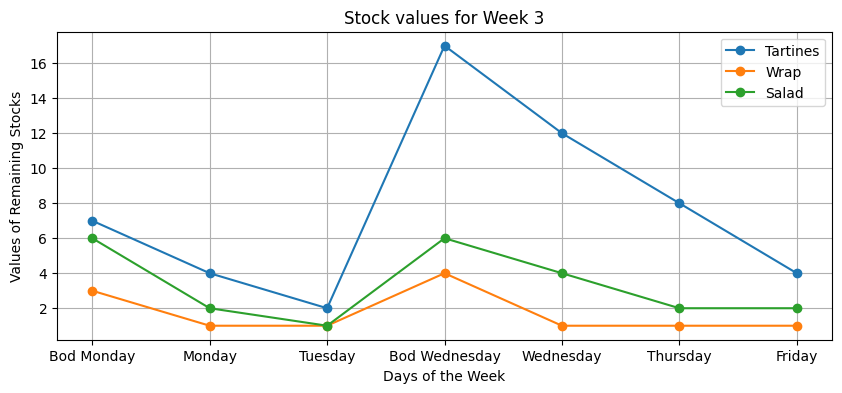

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

matrix_tartines = np.array([
   [ 9.,  6.,  3., 20., 16., 10.,  3.],
 [ 7.,  4.,  0., 13., 11.,  9.,  2.],
 [ 7.,  4.,  2., 17., 12.,  8.,  4.],
 [10.,  6.,  3., 11.,  8.,  8.,  4.],
 [ 8.,  5.,  2., 10.,  8.,  7.,  3.],
 [ 8.,  7.,  5., 12.,  9.,  5.,  3.],
 [ 8.,  3.,  1.,  9.,  4.,  3.,  3.],
 [ 8.,  4.,  2.,  9.,  8.,  4.,  2.],
 [11.,  5.,  3., 12.,  7.,  2.,  2.],
 [ 9.,  7.,  3., 13.,  7.,  5.,  3.],
 [ 9.,  8.,  5., 15., 12.,  6.,  4.],
 [10.,  4.,  1., 21., 12., 11.,  8.],
 [ 0.,  0.,  8.,  8.,  5.,  1., -1.],
 [ 7.,  5.,  4., 19.,  8.,  7.,  3.],
 [ 7.,  4.,  1.,  7.,  6.,  3.,  2.],
 [ 5.,  3.,  0.,  5.,  3.,  1.,  1.],
 [ 6.,  5.,  1.,  0.,  1.,  4.,  2.],
 [ 8.,  4.,  2.,  0.,  1.,  1.,  1.],
 [ 6.,  5.,  2.,  8.,  5.,  0., -1.]

])

matrix_wrap = np.array([
    [ 5.,  4.,  3.,  9.,  7.,  4.,  4.],
 [ 4.,  1.,  0.,  8.,  7.,  4.,  1.],
 [ 3.,  1.,  1.,  4.,  1.,  1.,  1.],
 [ 5.,  4.,  1.,  7.,  4.,  2.,  2.],
 [ 5.,  2.,  0.,  5.,  3.,  0.,  0.],
 [ 4.,  0., -1.,  4.,  0., -2., -2.],
 [ 5.,  2.,  1.,  6.,  2.,  2.,  2.],
 [ 6.,  3.,  2.,  8.,  4.,  4.,  4.],
 [ 3.,  0., -2.,  4.,  1.,  0.,  0.],
 [ 9.,  2.,  1.,  9.,  2.,  2.,  2.],
 [10.,  3.,  3.,  6.,  2.,  2.,  2.],
 [ 9.,  5.,  1., 11.,  9.,  1., -1.],
 [ 0.,  0.,  3.,  3.,  0., -1., -1.],
 [10.,  5.,  4., 14.,  7.,  4.,  3.],
 [ 7.,  6.,  5., 14., 11.,  9.,  4.],
 [11.,  5.,  2., 16.,  7.,  1.,  1.],
 [ 5.,  0.,  0.,  0.,  0.,  0.,  0.],
 [16., 12.,  5.,  5.,  2.,  2.,  0.],
 [ 8.,  2., -1., 16.,  9.,  1., -2.]

])

matrix_salad = np.array([
 [ 8.,  7.,  4., 13., 12.,  9.,  8.],
 [ 6.,  3.,  2.,  8.,  8.,  6.,  1.],
 [ 6.,  2.,  1.,  6.,  4.,  2.,  2.],
 [ 5.,  3.,  1.,  9.,  9.,  9.,  7.],
 [ 7.,  6.,  3.,  8.,  7.,  6.,  3.],
 [ 7.,  7.,  4.,  6.,  5.,  4.,  4.],
 [ 7.,  5.,  4., 12.,  7.,  4.,  3.],
 [ 6.,  3.,  2.,  7.,  7.,  4.,  3.],
 [ 5.,  1.,  0.,  5.,  4., -1., -1.],
 [ 7.,  6.,  1.,  5.,  4.,  4.,  1.],
 [ 6.,  1.,  0.,  9.,  4.,  2.,  1.],
 [ 7.,  3.,  2., 12.,  7.,  4.,  0.],
 [ 0.,  0.,  6.,  6.,  3.,  2.,  0.],
 [ 7.,  6.,  4.,  8.,  7.,  3.,  2.],
 [ 8.,  4.,  3.,  8.,  5.,  4.,  3.],
 [ 6.,  3.,  2.,  8.,  5.,  3.,  3.],
 [ 6.,  4.,  0.,  0.,  0.,  3.,  2.],
 [10.,  7.,  6.,  6.,  6.,  6.,  6.],
 [ 7.,  3.,  2.,  9.,  7.,  6.,  4.]

])


# Days of the week as labels for the x-axis
days = ["Bod Monday", "Monday", "Tuesday", "Bod Wednesday", "Wednesday", "Thursday", "Friday"]

def plot_weekly_data(week_index):
    # Check if the week index is within the bounds of the matrices
    if week_index >= matrix_tartines.shape[0] or week_index >= matrix_wrap.shape[0] or week_index >= matrix_salad.shape[0]:
        print("Week index is out of bounds.")
        return

    # Plot data for the specified week
    plt.figure(figsize=(10, 4))

    # Plotting each product's percentages for the given week
    plt.plot(days, matrix_tartines[week_index, :], marker='o', label='Tartines')
    plt.plot(days, matrix_wrap[week_index, :], marker='o', label='Wrap')
    plt.plot(days, matrix_salad[week_index, :], marker='o', label='Salad')

    plt.title(f'Stock values for Week {week_index + 1}')
    plt.xlabel('Days of the Week')
    plt.ylabel('Values of Remaining Stocks')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_weekly_data(2)  # Visualizing data for Week1 till 20


In [ ]:
Tartines_msc_4=np.array([
[ 9.,  6.,  3., 20., 16., 10.,  3.],
[ 7.,  4.,  0., 13., 11.,  9.,  2.],
[ 7.,  4.,  2., 17., 12.,  8.,  4.],
[10.,  6.,  3., 11.,  8.,  8.,  4.]
])

meal_salads_msc_4=np.array([
[ 8.,  7.,  4., 13., 12.,  9.,  8.],
[ 6.,  3.,  2.,  8.,  8.,  6.,  1.],
[ 6.,  2.,  1.,  6.,  4.,  2.,  2.],
[ 5.,  3.,  1.,  9.,  9.,  9.,  7.]
])


wraps_msc_4=np.array([
[ 5.,  4.,  3.,  9.,  7.,  4.,  4.],
[ 4.,  1.,  0.,  8.,  7.,  4.,  1.],
[ 3.,  1.,  1.,  4.,  1.,  1.,  1.],
[ 5.,  4.,  1.,  7.,  4.,  2.,  2.]

])


#Remaining product matrices
result_Tartines_msc_4=np.copy(Tartines_msc_4)
result_Tartines_msc_4[:,1]=result_Tartines_msc_4[:,1]/result_Tartines_msc_4[:,0]*100
result_Tartines_msc_4[:,4]=result_Tartines_msc_4[:,4]/result_Tartines_msc_4[:,3]*100
result_Tartines_msc_4[:,5]=result_Tartines_msc_4[:,5]/result_Tartines_msc_4[:,3]*100
result_Tartines_msc_4[:,6]=result_Tartines_msc_4[:,6]/result_Tartines_msc_4[:,3]*100
result_Tartines_msc_4[:,0]=result_Tartines_msc_4[:,0]/result_Tartines_msc_4[:,0]*100
result_Tartines_msc_4[:,3]=result_Tartines_msc_4[:,3]/result_Tartines_msc_4[:,3]*100
#print(result_Tartines_msc_4)


result_meal_salads_msc_4=np.copy(meal_salads_msc_4)
result_meal_salads_msc_4[:,1]=result_meal_salads_msc_4[:,1]/result_meal_salads_msc_4[:,0]*100
result_meal_salads_msc_4[:,4]=result_meal_salads_msc_4[:,4]/result_meal_salads_msc_4[:,3]*100
result_meal_salads_msc_4[:,5]=result_meal_salads_msc_4[:,5]/result_meal_salads_msc_4[:,3]*100
result_meal_salads_msc_4[:,6]=result_meal_salads_msc_4[:,6]/result_meal_salads_msc_4[:,3]*100
result_meal_salads_msc_4[:,0]=result_meal_salads_msc_4[:,0]/result_meal_salads_msc_4[:,0]*100
result_meal_salads_msc_4[:,3]=result_meal_salads_msc_4[:,3]/result_meal_salads_msc_4[:,3]*100
#print(result_meal_salads_msc_4)

result_wraps_msc_4=np.copy(wraps_msc_4)
result_wraps_msc_4[:,1]=result_wraps_msc_4[:,1]/result_wraps_msc_4[:,0]*100
result_wraps_msc_4[:,4]=result_wraps_msc_4[:,4]/result_wraps_msc_4[:,3]*100
result_wraps_msc_4[:,5]=result_wraps_msc_4[:,5]/result_wraps_msc_4[:,3]*100
result_wraps_msc_4[:,6]=result_wraps_msc_4[:,6]/result_wraps_msc_4[:,3]*100
result_wraps_msc_4[:,0]=result_wraps_msc_4[:,0]/result_wraps_msc_4[:,0]*100
result_wraps_msc_4[:,3]=result_wraps_msc_4[:,3]/result_wraps_msc_4[:,3]*100
#print(result_wraps_msc_4)


#Remaining fridge matrices
result_msc_Tartines_4=np.zeros((4,7))
result_msc_Tartines_4[:,0]=((Tartines_msc_4[:,0])/((Tartines_msc_4[:,0]+ meal_salads_msc_4[:,0]+ wraps_msc_4[:,0])))*100
result_msc_Tartines_4[:,1]=((Tartines_msc_4[:,1])/((Tartines_msc_4[:,0]+ meal_salads_msc_4[:,0]+ wraps_msc_4[:,0])))*100
result_msc_Tartines_4[:,2]=((Tartines_msc_4[:,2])/((Tartines_msc_4[:,0]+ meal_salads_msc_4[:,0]+ wraps_msc_4[:,0])))*100
result_msc_Tartines_4[:,3]=((Tartines_msc_4[:,3])/((Tartines_msc_4[:,3]+ meal_salads_msc_4[:,3]+ wraps_msc_4[:,3])))*100
result_msc_Tartines_4[:,4]=((Tartines_msc_4[:,4])/((Tartines_msc_4[:,3]+ meal_salads_msc_4[:,3]+ wraps_msc_4[:,3])))*100
result_msc_Tartines_4[:,5]=((Tartines_msc_4[:,5])/((Tartines_msc_4[:,3]+ meal_salads_msc_4[:,3]+ wraps_msc_4[:,3])))*100
result_msc_Tartines_4[:,6]=((Tartines_msc_4[:,6])/((Tartines_msc_4[:,3]+ meal_salads_msc_4[:,3]+ wraps_msc_4[:,3])))*100

print(result_msc_Tartines_4)
qqqq

result_msc_meal_salads_4=np.zeros((4,5))
result_msc_meal_salads_4[:,0]=((meal_salads_msc_4[:,0])/((Tartines_msc_4[:,0]+ meal_salads_msc_4[:,0]+ wraps_msc_4[:,0])))*100
result_msc_meal_salads_4[:,1]=((meal_salads_msc_4[:,1])/((Tartines_msc_4[:,0]+ meal_salads_msc_4[:,0]+ wraps_msc_4[:,0])))*100
result_msc_meal_salads_4[:,2]=((meal_salads_msc_4[:,2])/((Tartines_msc_4[:,2]+ meal_salads_msc_4[:,2]+ wraps_msc_4[:,2])))*100
result_msc_meal_salads_4[:,3]=((meal_salads_msc_4[:,3])/((Tartines_msc_4[:,2]+ meal_salads_msc_4[:,2]+ wraps_msc_4[:,2])))*100
result_msc_meal_salads_4[:,4]=((meal_salads_msc_4[:,4])/((Tartines_msc_4[:,2]+ meal_salads_msc_4[:,2]+ wraps_msc_4[:,2])))*100

result_msc_wraps_4=np.zeros((4,5))
result_msc_wraps_4[:,0]=((wraps_msc_4[:,0])/((Tartines_msc_4[:,0]+ meal_salads_msc_4[:,0]+ wraps_msc_4[:,0])))*100
result_msc_wraps_4[:,1]=((wraps_msc_4[:,1])/((Tartines_msc_4[:,0]+ meal_salads_msc_4[:,0]+ wraps_msc_4[:,0])))*100
result_msc_wraps_4[:,2]=((wraps_msc_4[:,2])/((Tartines_msc_4[:,2]+ meal_salads_msc_4[:,2]+ wraps_msc_4[:,2])))*100
result_msc_wraps_4[:,3]=((wraps_msc_4[:,3])/((Tartines_msc_4[:,2]+ meal_salads_msc_4[:,2]+ wraps_msc_4[:,2])))*100
result_msc_wraps_4[:,4]=((wraps_msc_4[:,4])/((Tartines_msc_4[:,2]+ meal_salads_msc_4[:,2]+ wraps_msc_4[:,2])))*100



# Create labels for the y-axis
weeks = 4
days = 7
labels = [f"W{week+1}D{day+1}" for week in range(weeks) for day in range(days)]


# Plotting
fig, ax = plt.subplots(figsize=(15, 13))
width = 0.5

days_to_label = ["W1D1","W1D2","W1D3","W1D4","W1D5","W1D6","W1D7","W2D1","W2D2","W2D3","W2D4","W2D5","W2D6","W2D7","W3D1","W3D2","W3D3","W3D4","W3D5","W3D6","W3D7","W4D1","W4D2","W4D3","W4D4","W4D5","W4D6","W4D7"]
labels_to_add = ['17','10','35','23','15','','','','','','','','','','','']
flat_tartines = result_msc_Tartines_4.flatten()
print(flat_tartines)
qqq

flat_meal_salads = result_msc_meal_salads_4.flatten()
flat_wraps = result_msc_wraps_4.flatten()



# Stack bar plots
bars_Tartines=ax.barh(labels, flat_tartines, width, label='Tartines', color='grey')
bars_mealsalads=ax.barh(labels, flat_meal_salads, width, left=flat_tartines, label='Meal Salads', color='orange')
bars_wraps=ax.barh(labels, flat_wraps, width, left=(flat_tartines + flat_meal_salads), label='Wraps', color='red')

# Add labels for specified days
for day, specific_label in zip(days_to_label, labels_to_add):
    amount_label = labels.index(day)
    result_label = flat_tartines[amount_label] + flat_meal_salads[amount_label] + flat_wraps[amount_label]
    ax.text(result_label + 1, amount_label, specific_label, va='center', color='black')


def add_labels(bars, result_msc_4):
    for bar, result in zip(bars, result_msc_4):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                 f'{result}%', ha='center', va='center', color='white', fontweight='bold')

# Add labels to each stack
add_labels(bars_Tartines, result_Tartines_msc_4.flatten().round())
add_labels(bars_mealsalads, result_meal_salads_msc_4.flatten().round())
add_labels(bars_wraps, result_wraps_msc_4.flatten().round())




ax.set_xlabel('Percentage')
ax.set_title('Remaining Percentage Stocks of Products by Day and Week in MSC Belgium fridge for week1-week4')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.legend()

plt.show()

[[40.90909091 27.27272727 13.63636364 47.61904762 38.0952381  23.80952381
   7.14285714]
 [41.17647059 23.52941176  0.         44.82758621 37.93103448 31.03448276
   6.89655172]
 [43.75       25.         12.5        62.96296296 44.44444444 29.62962963
  14.81481481]
 [50.         30.         15.         40.74074074 29.62962963 29.62962963
  14.81481481]]


NameError: name 'qqqq' is not defined

##Percentage

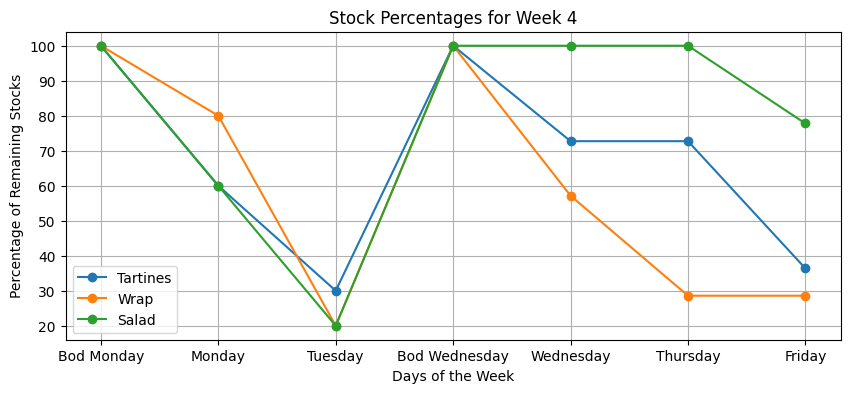

In [ ]:
matrix_tartines =np.array([
    [100., 66.66666667, 33.33333333, 100., 80., 50., 15.],
 [100., 57.14285714, 0., 100., 84.61538462, 69.23076923, 15.38461538],
 [100., 57.14285714, 28.57142857, 100., 70.58823529, 47.05882353, 23.52941176],
 [100., 60., 30., 100., 72.72727273, 72.72727273, 36.36363636],
 [100., 62.5, 25., 100., 80., 70., 30.],
 [100., 87.5, 62.5, 100., 75., 41.66666667, 25.],
 [100., 37.5, 12.5, 100., 44.44444444, 33.33333333, 33.33333333],
 [100., 50., 25., 100., 88.88888889, 44.44444444, 22.22222222],
 [100., 45.45454545, 27.27272727, 100., 58.33333333, 16.66666667, 16.66666667],
 [100., 77.77777778, 33.33333333, 100., 53.84615385, 38.46153846, 23.07692308],
 [100., 88.88888889, 55.55555556, 100., 80., 40., 26.66666667],
 [100., 40., 10., 100., 57.14285714, 52.38095238, 38.0952381],
 [np.nan, np.nan, np.nan, 100., 62.5, 12.5, -12.5],
 [100., 71.42857143, 57.14285714, 100., 42.10526316, 36.84210526, 15.78947368],
 [100., 57.14285714, 14.28571429, 100., 85.71428571, 42.85714286, 28.57142857],
 [100., 60., 0., 100., 60., 20., 20.],
 [100., 83.33333333, 16.66666667, np.nan, np.nan, np.nan, np.nan],
 [100., 50., 25., np.nan, np.nan, np.nan, np.nan],
 [100., 83.33333333, 33.33333333, 100., 62.5, 0., -12.5]])

matrix_wrap = np.array([
     [100., 80., 60., 100., 77.77777778, 44.44444444, 44.44444444],
 [100., 25., 0., 100., 87.5, 50., 12.5],
 [100., 33.33333333, 33.33333333, 100., 25., 25., 25.],
 [100., 80., 20., 100., 57.14285714, 28.57142857, 28.57142857],
 [100., 40., 0., 100., 60., 0., 0.],
 [np.nan, 0., -25., 100., 0., -50., -50.],
 [100., 40., 20., 100., 33.33333333, 33.33333333, 33.33333333],
 [100., 50., 33.33333333, 100., 50., 50., 50.],
 [np.nan, 0., -66.66666667, 100., 25., 0., 0.],
 [100., 22.22222222, 11.11111111, 100., 22.22222222, 22.22222222, 22.22222222],
 [100., 30., 30., 100., 33.33333333, 33.33333333, 33.33333333],
 [100., 55.55555556, 11.11111111, 100., 81.81818182, 9.09090909, -9.09090909],
 [np.nan, np.nan, np.nan, 100., 0., -33.33333333, -33.33333333],
 [100., 50., 40., 100., 50., 28.57142857, 21.42857143],
 [100., 85.71428571, 71.42857143, 100., 78.57142857, 64.28571429, 28.57142857],
 [100., 45.45454545, 18.18181818, 100., 43.75, 6.25, 6.25],
 [np.nan, 0., 0., np.nan, np.nan, np.nan, np.nan],
 [100., 75., 31.25, 100., 40., 40., 0.],
 [100., 25., -12.5, 100., 56.25, 6.25, -12.5]])


matrix_salad = np.array([
     [100., 87.5, 50., 100., 92.30769231, 69.23076923, 61.53846154],
 [100., 50., 33.33333333, 100., 100., 75., 12.5],
 [100., 33.33333333, 16.66666667, 100., 66.66666667, 33.33333333, 33.33333333],
 [100., 60., 20., 100., 100., 100., 77.77777778],
 [100., 85.71428571, 42.85714286, 100., 87.5, 75., 37.5],
 [100., 100., 57.14285714, 100., 83.33333333, 66.66666667, 66.66666667],
 [100., 71.42857143, 57.14285714, 100., 58.33333333, 33.33333333, 25.],
 [100., 50., 33.33333333, 100., 100., 57.14285714, 42.85714286],
 [100., 20., 0., 100., 80., -20., -20.],
 [100., 85.71428571, 14.28571429, 100., 80., 80., 20.],
 [100., 16.66666667, 0., 100., 44.44444444, 22.22222222, 11.11111111],
 [100., 42.85714286, 28.57142857, 100., 58.33333333, 33.33333333, 0.],
 [np.nan, np.nan, np.nan, 100., 50., 33.33333333, 0.],
 [100., 85.71428571, 57.14285714, 100., 87.5, 37.5, 25.],
 [100., 50., 37.5, 100., 62.5, 50., 37.5],
 [100., 50., 33.33333333, 100., 62.5, 37.5, 37.5],
 [100., 66.66666667, 0., np.nan, np.nan, np.nan, np.nan],
 [100., 70., 60., 100., 100., 100., 100.],
 [100., 42.85714286, 28.57142857, 100., 77.77777778, 66.66666667, 44.44444444]])


# Days of the week as labels for the x-axis
days = ["Bod Monday", "Monday", "Tuesday", "Bod Wednesday", "Wednesday", "Thursday", "Friday"]

def plot_weekly_data(week_index):
    # Check if the week index is within the bounds of the matrices
    if week_index >= matrix_tartines.shape[0] or week_index >= matrix_wrap.shape[0] or week_index >= matrix_salad.shape[0]:
        print("Week index is out of bounds.")
        return

    # Plot data for the specified week
    plt.figure(figsize=(10, 4))

    # Plotting each product's percentages for the given week
    plt.plot(days, matrix_tartines[week_index, :], marker='o', label='Tartines')
    plt.plot(days, matrix_wrap[week_index, :], marker='o', label='Wrap')
    plt.plot(days, matrix_salad[week_index, :], marker='o', label='Salad')

    plt.title(f'Stock Percentages for Week {week_index + 1}')
    plt.xlabel('Days of the Week')
    plt.ylabel('Percentage of Remaining Stocks')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_weekly_data(3)  # Visualizing data for Week1 till 20



##MSC Shared Service fridge

##New

##Absolute

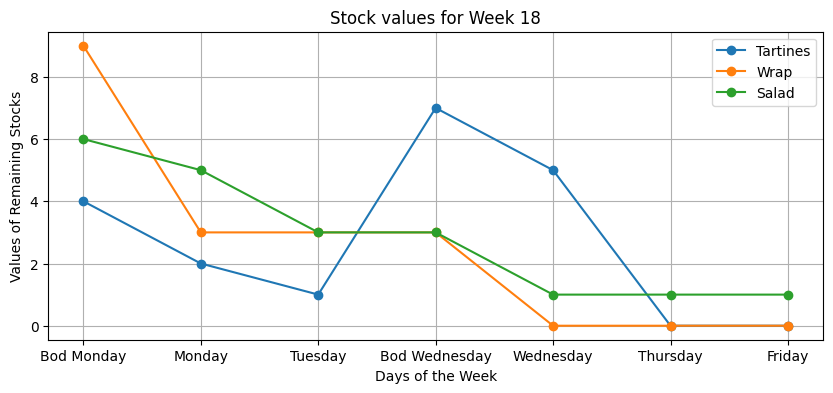

In [ ]:
matrix_tartines_ss = np.array([
    [ 3.,  2.,  0., 10., 12., 10., 10.],
 [ 3.,  2.,  2., 12.,  9.,  5.,  2.],
 [ 3.,  3.,  1.,  9.,  3.,  3.,  1.],
 [ 4.,  0.,  0.,  4.,  3.,  3.,  3.],
 [ 2.,  2.,  2.,  4.,  6.,  3.,  3.],
 [ 3.,  0.,  0.,  8.,  2.,  0.,  0.],
 [ 2.,  1.,  0.,  4.,  3.,  2.,  0.],
 [ 3.,  4.,  2.,  5.,  8.,  3.,  2.],
 [ 7.,  3.,  2.,  8.,  7.,  4.,  1.],
 [ 5.,  1.,  0.,  9.,  5.,  1.,  1.],
 [ 4.,  3.,  1.,  7.,  5.,  4.,  0.],
 [ 6.,  0.,  4., 10.,  3.,  0.,  0.],
 [ 6.,  4.,  3.,  5.,  7.,  5.,  4.],
 [ 7.,  3.,  1., 12.,  8.,  2.,  1.],
 [ 8.,  8.,  6., 11.,  8.,  7.,  4.],
 [ 6.,  3.,  1.,  1.,  1.,  4.,  2.],
 [ 7.,  5.,  5.,  5.,  0.,  0., -1.],
 [ 4.,  2.,  1.,  7.,  5.,  0.,  0.]

])

matrix_salad_ss = np.array([
  [ 1.,  1.,  0.,  4.,  3.,  2.,  1.],
 [ 4.,  4.,  4.,  7.,  6.,  5.,  5.],
 [ 3.,  3.,  1.,  4.,  3.,  1.,  1.],
 [ 3.,  2.,  1.,  4.,  2.,  1.,  1.],
 [ 3.,  3.,  1.,  4.,  3.,  3.,  3.],
 [ 2.,  1.,  1.,  4.,  3.,  3.,  3.],
 [ 3.,  2.,  1.,  4.,  4.,  3.,  2.],
 [ 4.,  3.,  2.,  6.,  3.,  1.,  0.],
 [ 5.,  5.,  3.,  8.,  7.,  5.,  4.],
 [ 6.,  3.,  3.,  8.,  7.,  7.,  5.],
 [ 4.,  4.,  2.,  7.,  7.,  6.,  5.],
 [ 4.,  3.,  2.,  7.,  6.,  6.,  5.],
 [ 0.,  0.,  4.,  4.,  4.,  3.,  2.],
 [ 3.,  3.,  1.,  4.,  3.,  3.,  3.],
 [ 4.,  0.,  0.,  6.,  4.,  1., -1.],
 [ 6.,  5.,  3.,  9.,  8.,  5.,  5.],
 [ 3.,  2.,  0.,  0.,  0.,  2.,  1.],
 [ 6.,  5.,  3.,  3.,  1.,  1.,  1.],
 [ 4.,  4.,  0.,  7.,  3.,  1.,  1.]

])

matrix_wrap_ss = np.array([
    [ 2.,  2.,  1.,  5.,  5.,  3.,  2.],
 [ 4.,  1.,  0.,  4.,  3.,  1.,  1.],
 [ 4.,  2.,  2.,  5.,  4.,  3.,  2.],
 [ 4.,  3.,  0.,  5.,  5.,  5.,  4.],
 [ 3.,  1.,  1.,  5.,  2.,  2.,  2.],
 [ 4.,  2.,  0.,  3.,  1.,  1.,  1.],
 [ 3.,  2.,  1.,  9.,  4.,  3.,  3.],
 [ 3.,  2.,  1.,  6.,  3.,  1.,  1.],
 [ 3.,  1.,  0.,  7.,  5., -1., -1.],
 [ 7.,  1.,  0.,  5.,  2.,  0.,  0.],
 [ 7.,  0., -2.,  8.,  2.,  0., -2.],
 [ 8.,  7.,  6., 11.,  5.,  3.,  3.],
 [ 0.,  0.,  7.,  7.,  4.,  3.,  2.],
 [ 7.,  4.,  1., 13., 10.,  7.,  4.],
 [ 5.,  2.,  0., 12., 10.,  4.,  1.],
 [10.,  5.,  2., 14., 12.,  9.,  4.],
 [ 6.,  2.,  0.,  0.,  0.,  1.,  1.],
 [ 9.,  3.,  3.,  3.,  0.,  0.,  0.],
 [ 7.,  3.,  1., 10.,  2.,  1.,  1.]

])



# Days of the week as labels for the x-axis
days = ["Bod Monday", "Monday", "Tuesday", "Bod Wednesday", "Wednesday", "Thursday", "Friday"]

def plot_weekly_data(week_index):
    # Check if the week index is within the bounds of the matrices
    if week_index >= matrix_tartines_ss.shape[0] or week_index >= matrix_wrap.shape[0] or week_index >= matrix_salad.shape[0]:
        print("Week index is out of bounds.")
        return

    # Plot data for the specified week
    plt.figure(figsize=(10, 4))

    # Plotting each product's percentages for the given week
    plt.plot(days, matrix_tartines_ss[week_index, :], marker='o', label='Tartines')
    plt.plot(days, matrix_wrap_ss[week_index, :], marker='o', label='Wrap')
    plt.plot(days, matrix_salad_ss[week_index, :], marker='o', label='Salad')

    plt.title(f'Stock values for Week {week_index + 1}')
    plt.xlabel('Days of the Week')
    plt.ylabel('Values of Remaining Stocks')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_weekly_data(17)  # Visualizing data for Week1 till 20

##Percentage

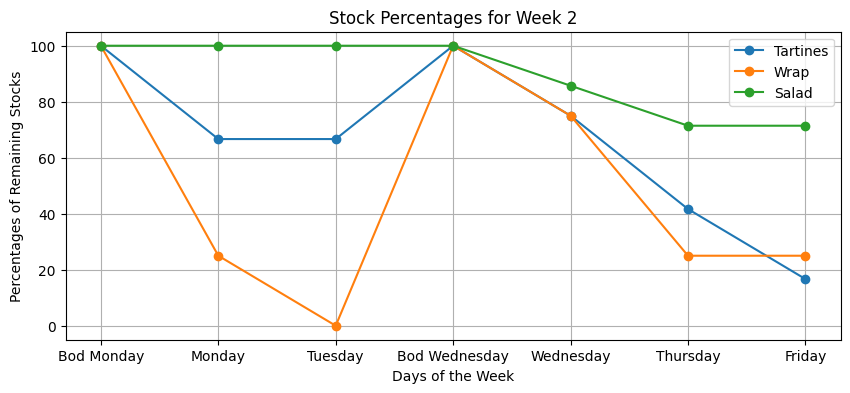

In [ ]:
matrix_tartines_ss=np.array([[100., 66.66666667, 0., 100., 120., 100., 100.],
 [100., 66.66666667, 66.66666667, 100., 75., 41.66666667, 16.66666667],
 [100., 100., 33.33333333, 100., 33.33333333, 33.33333333, 11.11111111],
 [np.nan, 0., 0., 100., 75., 75., 75.],
 [100., 100., 100., 100., 150., 75., 75.],
 [np.nan, 0., 0., 100., 25., 0., 0.],
 [100., 50., 0., 100., 75., 50., 0.],
 [100., 133.33333333, 66.66666667, 100., 160., 60., 40.],
 [100., 42.85714286, 28.57142857, 100., 87.5, 50., 12.5],
 [100., 20., 0., 100., 55.55555556, 11.11111111, 11.11111111],
 [100., 75., 25., 100., 71.42857143, 57.14285714, 0.],
 [np.nan, 0., 66.66666667, 100., 30., 0., 0.],
 [100., 66.66666667, 50., 100., 140., 100., 80.],
 [100., 42.85714286, 14.28571429, 100., 66.66666667, 16.66666667, 8.33333333],
 [100., 100., 75., 100., 72.72727273, 63.63636364, 36.36363636],
 [100., 50., 16.66666667, 100., 100., 400., 200.],
 [100., 71.42857143, 71.42857143, 100., 0., 0., -20.],
 [100., 50., 25., 100., 71.42857143, 0., 0.]])

matrix_salad_ss = np.array([[100., 100., 0., 100., 75., 50., 25.],
 [100., 100., 100., 100., 85.71428571, 71.42857143, 71.42857143],
 [100., 100., 33.33333333, 100., 75., 25., 25.],
 [100., 66.66666667, 33.33333333, 100., 50., 25., 25.],
 [100., 100., 33.33333333, 100., 75., 75., 75.],
 [100., 50., 50., 100., 75., 75., 75.],
 [100., 66.66666667, 33.33333333, 100., 100., 75., 50.],
 [100., 75., 50., 100., 50., 16.66666667, 0.],
 [100., 100., 60., 100., 87.5, 62.5, 50.],
 [100., 50., 50., 100., 87.5, 87.5, 62.5],
 [100., 100., 50., 100., 100., 85.71428571, 71.42857143],
 [100., 75., 50., 100., 85.71428571, 85.71428571, 71.42857143],
 [np.nan, np.nan, np.nan, 100., 100., 75., 50.],
 [100., 100., 33.33333333, 100., 75., 75., 75.],
 [np.nan, 0., 0., 100., 66.66666667, 16.66666667, -16.66666667],
 [100., 83.33333333, 50., 100., 88.88888889, 55.55555556, 55.55555556],
 [100., 66.66666667, 0., np.nan, np.nan, np.nan, np.nan],
 [100., 83.33333333, 50., 100., 33.33333333, 33.33333333, 33.33333333],
 [100., 100., 0., 100., 42.85714286, 14.28571429, 14.28571429]]
)

matrix_wrap_ss= np.array([[100., 100., 50., 100., 100., 60., 40.],
 [100., 25., 0., 100., 75., 25., 25.],
 [100., 50., 50., 100., 80., 60., 40.],
 [100., 75., 0., 100., 100., 100., 80.],
 [100., 33.33333333, 33.33333333, 100., 40., 40., 40.],
 [100., 50., 0., 100., 33.33333333, 33.33333333, 33.33333333],
 [100., 66.66666667, 33.33333333, 100., 44.44444444, 33.33333333, 33.33333333],
 [100., 66.66666667, 33.33333333, 100., 50., 16.66666667, 16.66666667],
 [100., 33.33333333, 0., 100., 71.42857143, -14.28571429, -14.28571429],
 [100., 14.28571429, 0., 100., 40., 0., 0.],
 [np.nan, 0., -28.57142857, 100., 25., 0., -25.],
 [100., 87.5, 75., 100., 45.45454545, 27.27272727, 27.27272727],
 [np.nan, np.nan, np.nan, 100., 57.14285714, 42.85714286, 28.57142857],
 [100., 57.14285714, 14.28571429, 100., 76.92307692, 53.84615385, 30.76923077],
 [100., 40., 0., 100., 83.33333333, 33.33333333, 8.33333333],
 [100., 50., 20., 100., 85.71428571, 64.28571429, 28.57142857],
 [100., 33.33333333, 0., np.nan, np.nan, np.nan, np.nan],
 [100., 33.33333333, 33.33333333, 100., 0., 0., 0.],
 [100., 42.85714286, 14.28571429, 100., 20., 10., 10.]]
)



# Days of the week as labels for the x-axis
days = ["Bod Monday", "Monday", "Tuesday", "Bod Wednesday", "Wednesday", "Thursday", "Friday"]

def plot_weekly_data(week_index):
    # Check if the week index is within the bounds of the matrices
    if week_index >= matrix_tartines_ss.shape[0] or week_index >= matrix_wrap.shape[0] or week_index >= matrix_salad.shape[0]:
        print("Week index is out of bounds.")
        return

    # Plot data for the specified week
    plt.figure(figsize=(10, 4))

    # Plotting each product's percentages for the given week
    plt.plot(days, matrix_tartines_ss[week_index, :], marker='o', label='Tartines')
    plt.plot(days, matrix_wrap_ss[week_index, :], marker='o', label='Wrap')
    plt.plot(days, matrix_salad_ss[week_index, :], marker='o', label='Salad')

    plt.title(f'Stock Percentages for Week {week_index + 1}')
    plt.xlabel('Days of the Week')
    plt.ylabel('Percentages of Remaining Stocks')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_weekly_data(1)  # Visualizing data for Week1 till 20

#Backups For test

In [ ]:
# grouped_data = data_main.groupby(['Day of the week', 'Weeknumber', 'Mouvement Type','Forecast Category','Stock/Non-Stock'])['Quantity Done'].sum().reset_index()
# grouped_data = grouped_data.sort_values(by=['Weeknumber', 'Day of the week', 'Mouvement Type','Forecast Category','Stock/Non-Stock'])
# grouped_data_final= grouped_data[grouped_data['Stock/Non-Stock']=='Non-stock']
# #print(grouped_data_final)


# day_1_data = grouped_data_final[grouped_data_final['Day of the week'] == 1]
# # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
# day_1_grouped = day_1_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category','Stock/Non-Stock'])['Quantity Done'].sum().reset_index()
# # Calculate net stock movement by week for Day 1
# day_1_net_movement = day_1_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
# # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
# pivot_day_1 = day_1_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)
# #print(pivot_day_1)

# # -----------------------------------------------

# has_transfer = any(day_1_grouped['Mouvement Type'] == 'Transfer')
# has_sold = any(day_1_grouped['Mouvement Type'] == 'Sold from')
# has_deliver = any(day_1_grouped['Mouvement Type'] == 'Delivered to')

# val_transfer = 0
# val_sold = 0
# val_deliver = 0

# if has_transfer:

#   val_transfer = pivot_day_1['Transfer']

# if has_sold:

#   val_sold = pivot_day_1['Sold from']

# if has_deliver:

#   val_deliver = pivot_day_1['Delivered to']


# pivot_day_1['Net Movement'] = val_deliver + val_sold + val_transfer

# # -----------------------------------------------


# # Calculate the net stock movement for Day 1 of each week


# #print(pivot_day_1)
# day_1_net_movement = day_1_net_movement.rename(columns={'Quantity Done': 'Quantity Done1'})

# day_1_net_movement['Quantity Done1'] = day_1_net_movement['Quantity Done1'].fillna(0)
# all_weeks = range(day_1_net_movement['Weeknumber'].min(), day_1_net_movement['Weeknumber'].max() + 1)
# day_1_net_movement.set_index('Weeknumber', inplace=True)
# day_1_net_movement = day_1_net_movement.reindex(all_weeks).fillna(0).reset_index()
# #print(day_1_net_movement)




# day_2_data = grouped_data[grouped_data['Day of the week'] == 2]
# # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
# day_2_grouped = day_2_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
# # Calculate net stock movement by week for Day 2
# day_2_net_movement = day_2_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
# # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
# pivot_day_2 = day_2_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

# # Calculate the net stock movement for Day 2 of each week
# # -----------------------------------------------

# has_transfer = any(day_2_grouped['Mouvement Type'] == 'Transfer')
# has_sold = any(day_2_grouped['Mouvement Type'] == 'Sold from')
# has_deliver = any(day_2_grouped['Mouvement Type'] == 'Delivered to')

# val_transfer = 0
# val_sold = 0
# val_deliver = 0

# if has_transfer:

#   val_transfer = pivot_day_2['Transfer']

# if has_sold:

#   val_sold = pivot_day_2['Sold from']

# if has_deliver:

#   val_deliver = pivot_day_2['Delivered to']


# pivot_day_2['Net Movement'] = val_deliver + val_sold + val_transfer

# # -----------------------------------------------

# #print(pivot_day_2)
# day_2_net_movement = day_2_net_movement.rename(columns={'Quantity Done': 'Quantity Done2'})

# day_2_net_movement['Quantity Done2'] = day_2_net_movement['Quantity Done2'].fillna(0)
# all_weeks = range(day_2_net_movement['Weeknumber'].min(), day_2_net_movement['Weeknumber'].max() + 1)
# day_2_net_movement.set_index('Weeknumber', inplace=True)
# day_2_net_movement = day_2_net_movement.reindex(all_weeks).fillna(0).reset_index()
# print(day_2_net_movement)


# day_3_data = grouped_data[grouped_data['Day of the week'] == 3]
# # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
# day_3_grouped = day_3_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
# # Calculate net stock movement by week for Day 3
# day_3_net_movement = day_3_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
# # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
# pivot_day_3 = day_3_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

# # -----------------------------------------------

# has_transfer = any(day_3_grouped['Mouvement Type'] == 'Transfer')
# has_sold = any(day_3_grouped['Mouvement Type'] == 'Sold from')
# has_deliver = any(day_3_grouped['Mouvement Type'] == 'Delivered to')

# val_transfer = 0
# val_sold = 0
# val_deliver = 0

# if has_transfer:

#   val_transfer = pivot_day_3['Transfer']

# if has_sold:

#   val_sold = pivot_day_3['Sold from']

# if has_deliver:

#   val_deliver = pivot_day_3['Delivered to']


# pivot_day_3['Net Movement'] = val_deliver + val_sold + val_transfer

# # -----------------------------------------------


# #print(pivot_day_3)
# day_3_net_movement = day_3_net_movement.rename(columns={'Quantity Done': 'Quantity Done3'})

# day_3_net_movement['Quantity Done3'] = day_3_net_movement['Quantity Done3'].fillna(0)
# all_weeks = range(day_3_net_movement['Weeknumber'].min(), day_3_net_movement['Weeknumber'].max() + 1)
# day_3_net_movement.set_index('Weeknumber', inplace=True)
# day_3_net_movement = day_3_net_movement.reindex(all_weeks).fillna(0).reset_index()
# # print(day_3_net_movement)



# day_4_data = grouped_data[grouped_data['Day of the week'] == 4]
# # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
# day_4_grouped = day_4_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
# # Calculate net stock movement by week for Day 4
# day_4_net_movement = day_4_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
# # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
# pivot_day_4 = day_4_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

# # -----------------------------------------------

# has_transfer = any(day_4_grouped['Mouvement Type'] == 'Transfer')
# has_sold = any(day_4_grouped['Mouvement Type'] == 'Sold from')
# has_deliver = any(day_4_grouped['Mouvement Type'] == 'Delivered to')

# val_transfer = 0
# val_sold = 0
# val_deliver = 0

# if has_transfer:

#   val_transfer = pivot_day_4['Transfer']

# if has_sold:

#   val_sold = pivot_day_4['Sold from']

# if has_deliver:

#   val_deliver = pivot_day_4['Delivered to']


# pivot_day_4['Net Movement'] = val_deliver + val_sold + val_transfer

# # -----------------------------------------------


# day_4_net_movement = day_4_net_movement.rename(columns={'Quantity Done': 'Quantity Done4'})

# day_4_net_movement['Quantity Done4'] = day_4_net_movement['Quantity Done4'].fillna(0)
# all_weeks = range(day_4_net_movement['Weeknumber'].min(), day_4_net_movement['Weeknumber'].max() + 1)
# day_4_net_movement.set_index('Weeknumber', inplace=True)
# day_4_net_movement = day_4_net_movement.reindex(all_weeks).fillna(0).reset_index()
# #print(day_4_net_movement)




# day_5_data = grouped_data[grouped_data['Day of the week'] == 5]
# # Group by 'Weeknumber' and 'Mouvement Type' and sum 'Quantity Done'
# day_5_grouped = day_5_data.groupby(['Weeknumber', 'Mouvement Type','Forecast Category'])['Quantity Done'].sum().reset_index()
# # Calculate net stock movement by week for Day 5
# day_5_net_movement = day_5_grouped.groupby('Weeknumber')['Quantity Done'].sum().reset_index()
# # Create a pivot table to better handle multiple 'Mouvement Type' entries per 'Weeknumber'
# pivot_day_5 = day_5_grouped.pivot_table(index='Weeknumber', columns='Mouvement Type', values='Quantity Done', fill_value=0)

# # -----------------------------------------------

# has_transfer = any(day_5_grouped['Mouvement Type'] == 'Transfer')
# has_sold = any(day_5_grouped['Mouvement Type'] == 'Sold from')
# has_deliver = any(day_5_grouped['Mouvement Type'] == 'Delivered to')

# val_transfer = 0
# val_sold = 0
# val_deliver = 0

# if has_transfer:

#   val_transfer = pivot_day_5['Transfer']

# if has_sold:

#   val_sold = pivot_day_5['Sold from']

# if has_deliver:

#   val_deliver = pivot_day_5['Delivered to']


# pivot_day_5['Net Movement'] = val_deliver + val_sold + val_transfer

# # -----------------------------------------------

# #print(pivot_day_5)
# day_5_net_movement = day_5_net_movement.rename(columns={'Quantity Done': 'Quantity Done5'})

# day_5_net_movement['Quantity Done5'] = day_5_net_movement['Quantity Done5'].fillna(0)
# all_weeks = range(day_5_net_movement['Weeknumber'].min(), day_5_net_movement['Weeknumber'].max() + 1)
# day_5_net_movement.set_index('Weeknumber', inplace=True)
# day_5_net_movement = day_5_net_movement.reindex(all_weeks).fillna(0).reset_index()
# #print(day_5_net_movement)




# con1 = pd.merge(day_1_net_movement, day_2_net_movement, on='Weeknumber', how='right')
# con2 = pd.merge(con1, day_3_net_movement, on='Weeknumber', how='left')
# con3 = pd.merge(con2, day_4_net_movement, on='Weeknumber', how='left')
# con4 = pd.merge(con3, day_5_net_movement, on='Weeknumber', how='left')
# confinal = con4.fillna(0)
# #print(confinal)



# inout_mat_ind = confinal.iloc[:,1:6].to_numpy()
# mat_ind = inout_mat_ind.cumsum(axis=1)

# inoutvec = confinal.iloc[:,1:6].to_numpy().flatten()


# csum_inout = inoutvec.cumsum()
# mat_chain = csum_inout.reshape((-1, 5))

    Weeknumber  Quantity Done2
0            1              62
1            2             -14
2            3             -28
3            4             -27
4            5             -34
5            6             -37
6            7             -31
7            8             -19
8            9             -24
9           10             -42
10          11             -39
11          12             -26
12          13             -29
13          14              75
